# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12.5 (фулл с бонусами)

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$ w = (X^\top X)^{-1} X^\top y$$

$$ \frac{d_w Q}{dw} = \dfrac{-2}{\ell}(y - Xw)^T X$$



### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:
https://contest.yandex.ru/contest/54610/run-report/95834113/

* **StochasticDescent**:
https://contest.yandex.ru/contest/54610/run-report/95834255/

* **MomentumDescent**:
https://contest.yandex.ru/contest/54610/run-report/95395158/

* **Adam**:
https://contest.yandex.ru/contest/54610/run-report/95396040/
* **LinearRegression**:
https://contest.yandex.ru/contest/54610/run-report/95396166/

Ник:tanigmatzyanov@edu.hse.ru

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [10]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

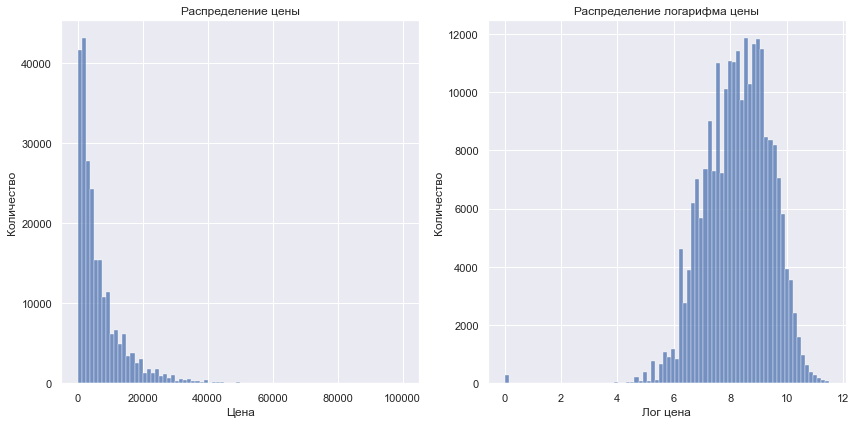

In [11]:
plt.figure(figsize=(12, 6)) 

plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=80)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.histplot(np.log(data['price']), bins=80)
plt.title('Распределение логарифма цены')
plt.xlabel('Лог цена')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()


Распределение логрифма цены выглядит как нормальное распределение с матожем около 8. Такое распределение более наглядно. Лучше буду использовать логарифм цены. Также по его распределению видно, что есть выброс около 0. Чтобы точно понять, можно построить boxplot.

In [12]:
data['log_price'] = np.log(data['price'])

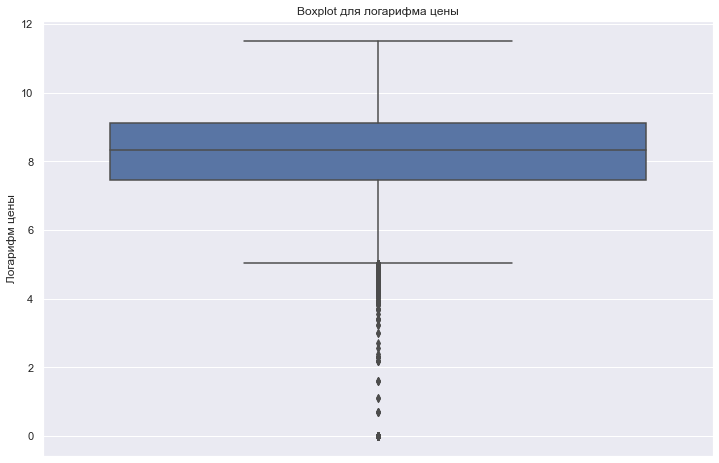

In [13]:
plt.figure(figsize=(12, 8)) 
plt.title('Boxplot для логарифма цены')
sns.boxplot(y=data['log_price'])
plt.ylabel('Логарифм цены')

plt.show()

Видно, что при логарфма цены < 5 есть выбросы. Я их удалю

In [14]:
data = data.loc[data['log_price'] >= 5]


### Исследование данных

1) Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака


Сначала сделаю для категориальных признаков

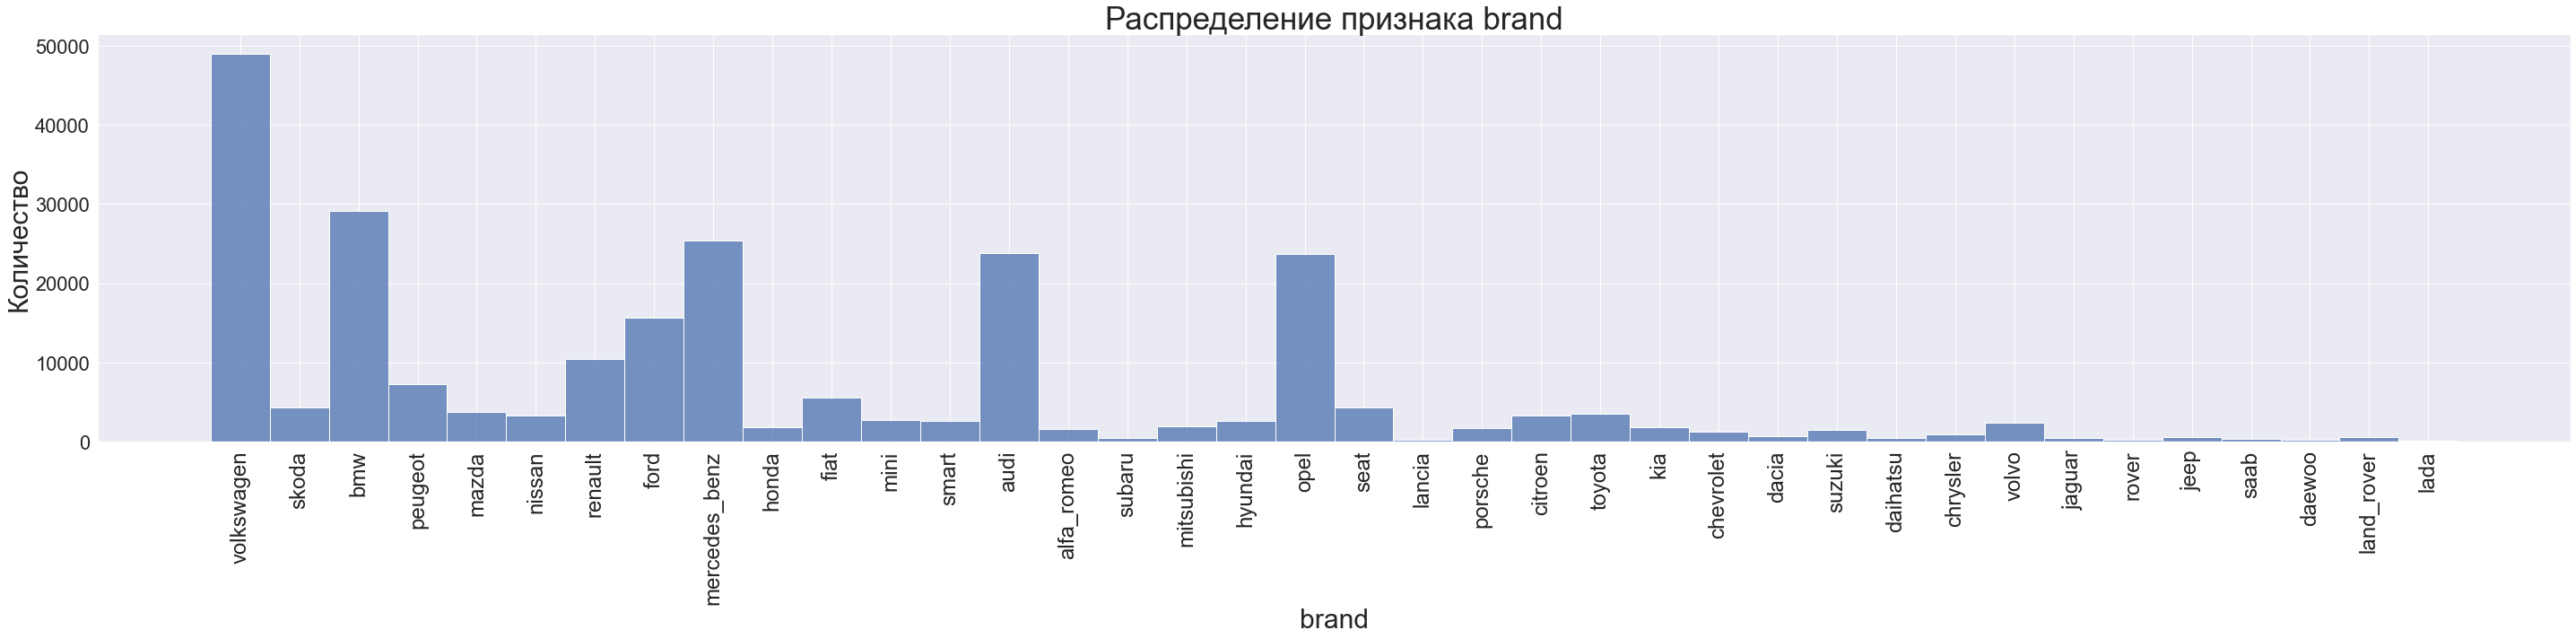

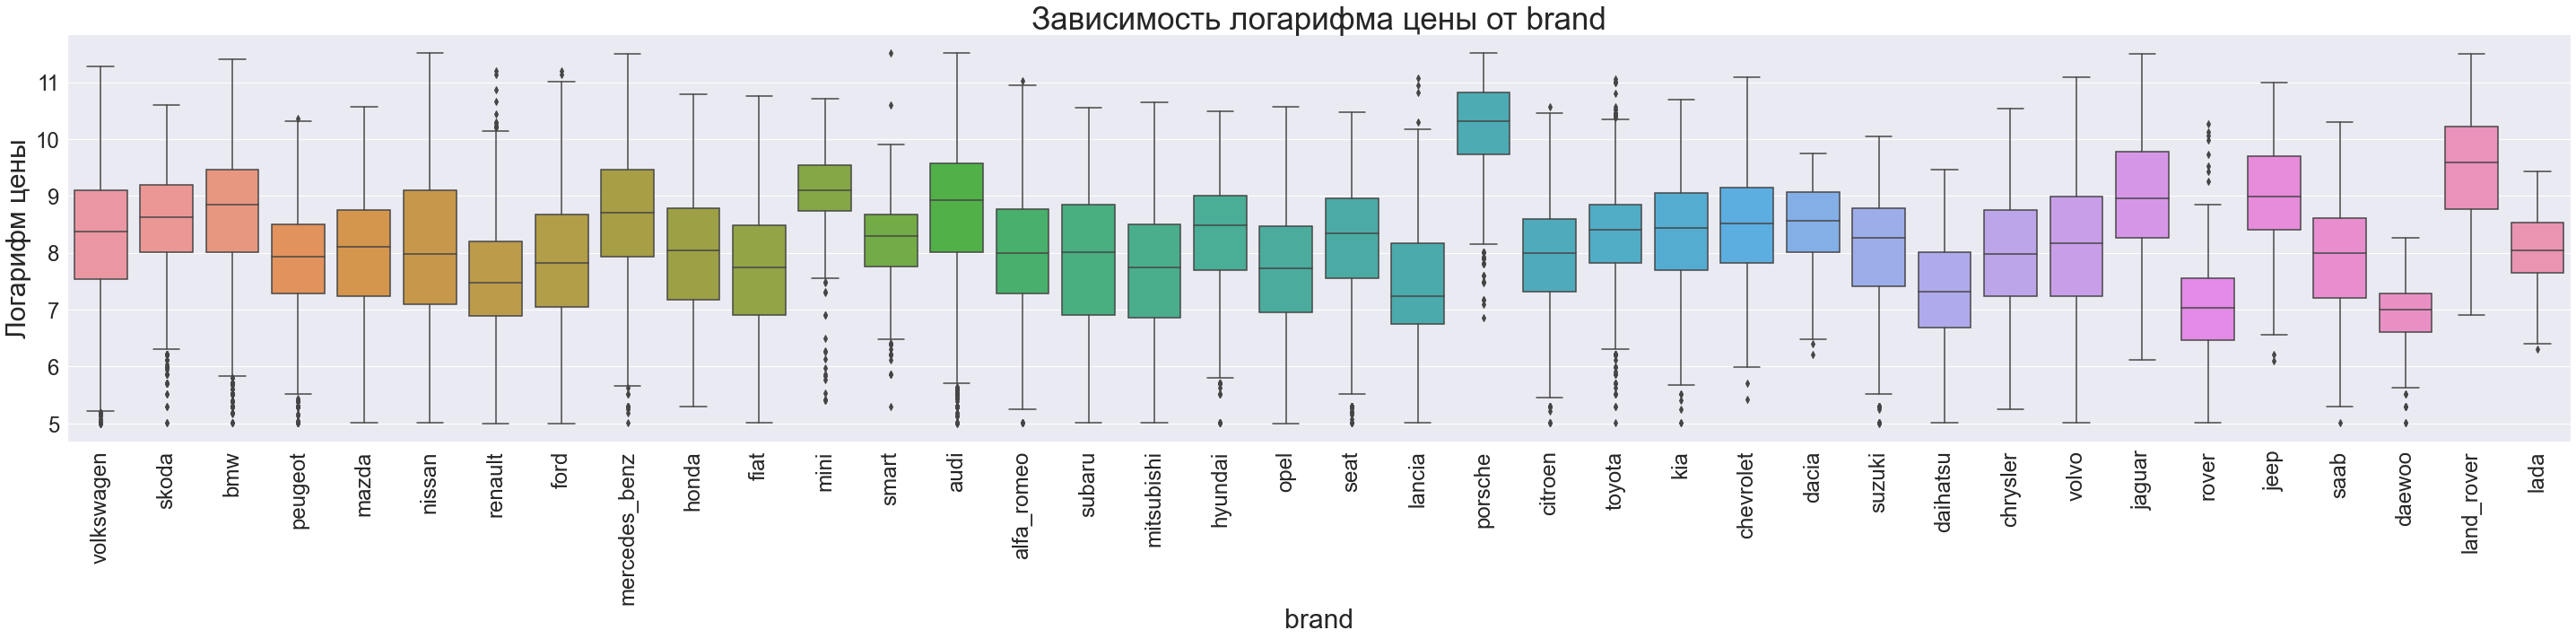

ГРАФИКИ ДЛЯ СЛЕДУЮЩЕГО ПРИЗНАКА


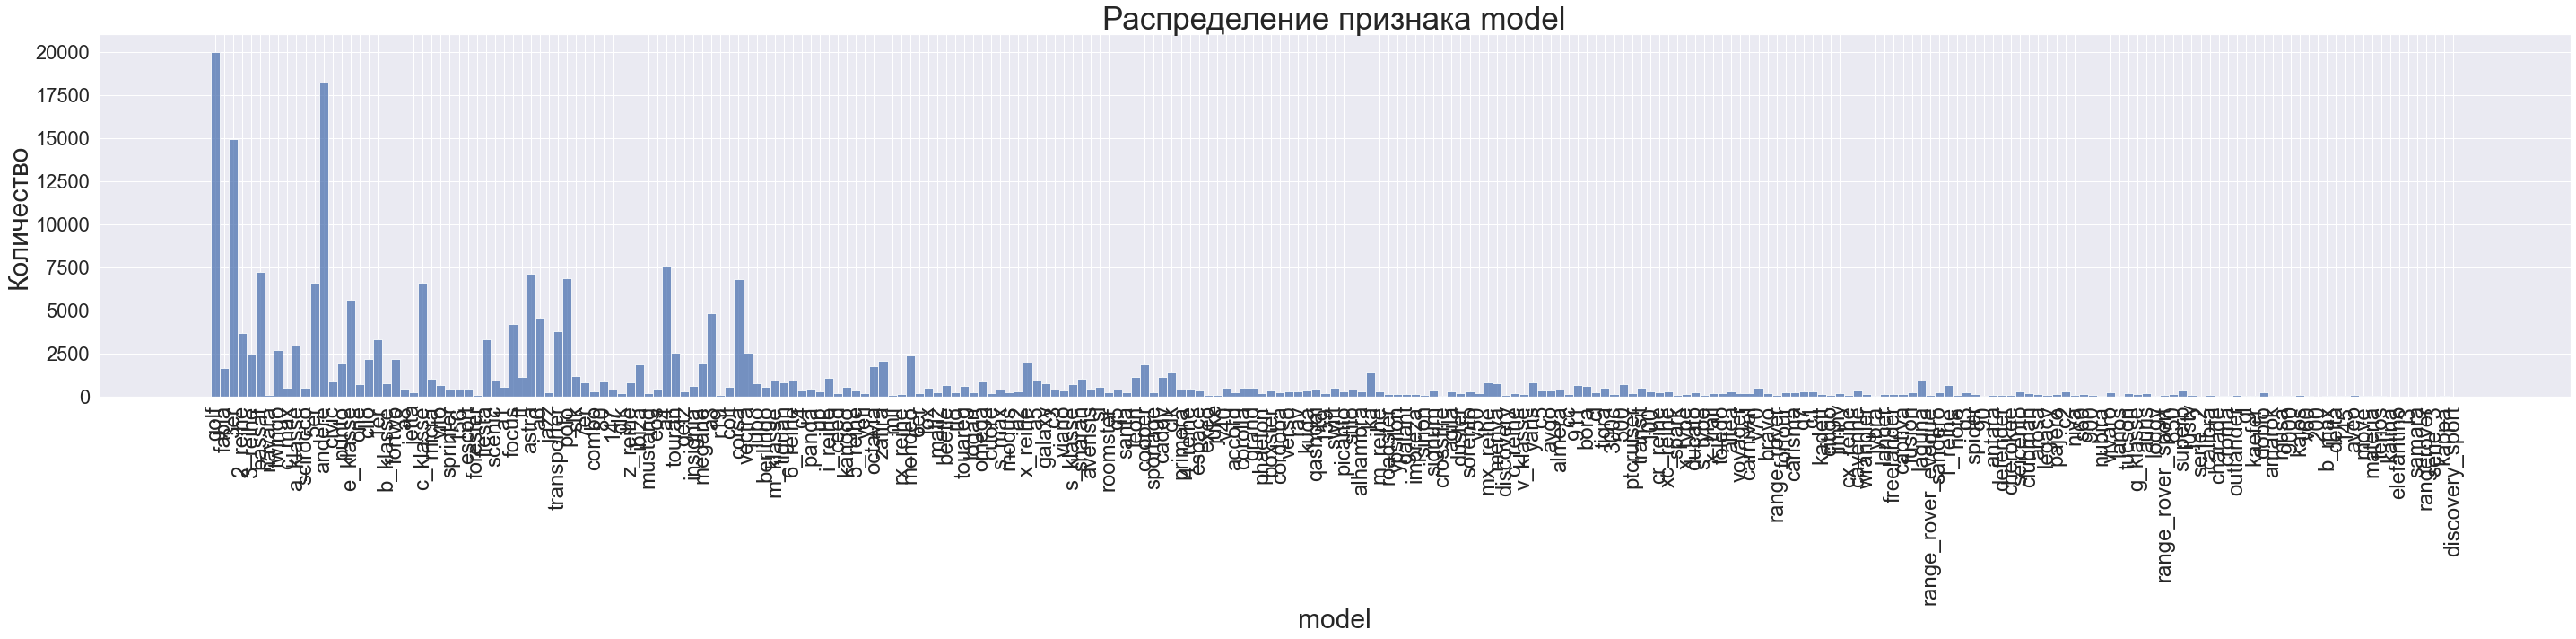

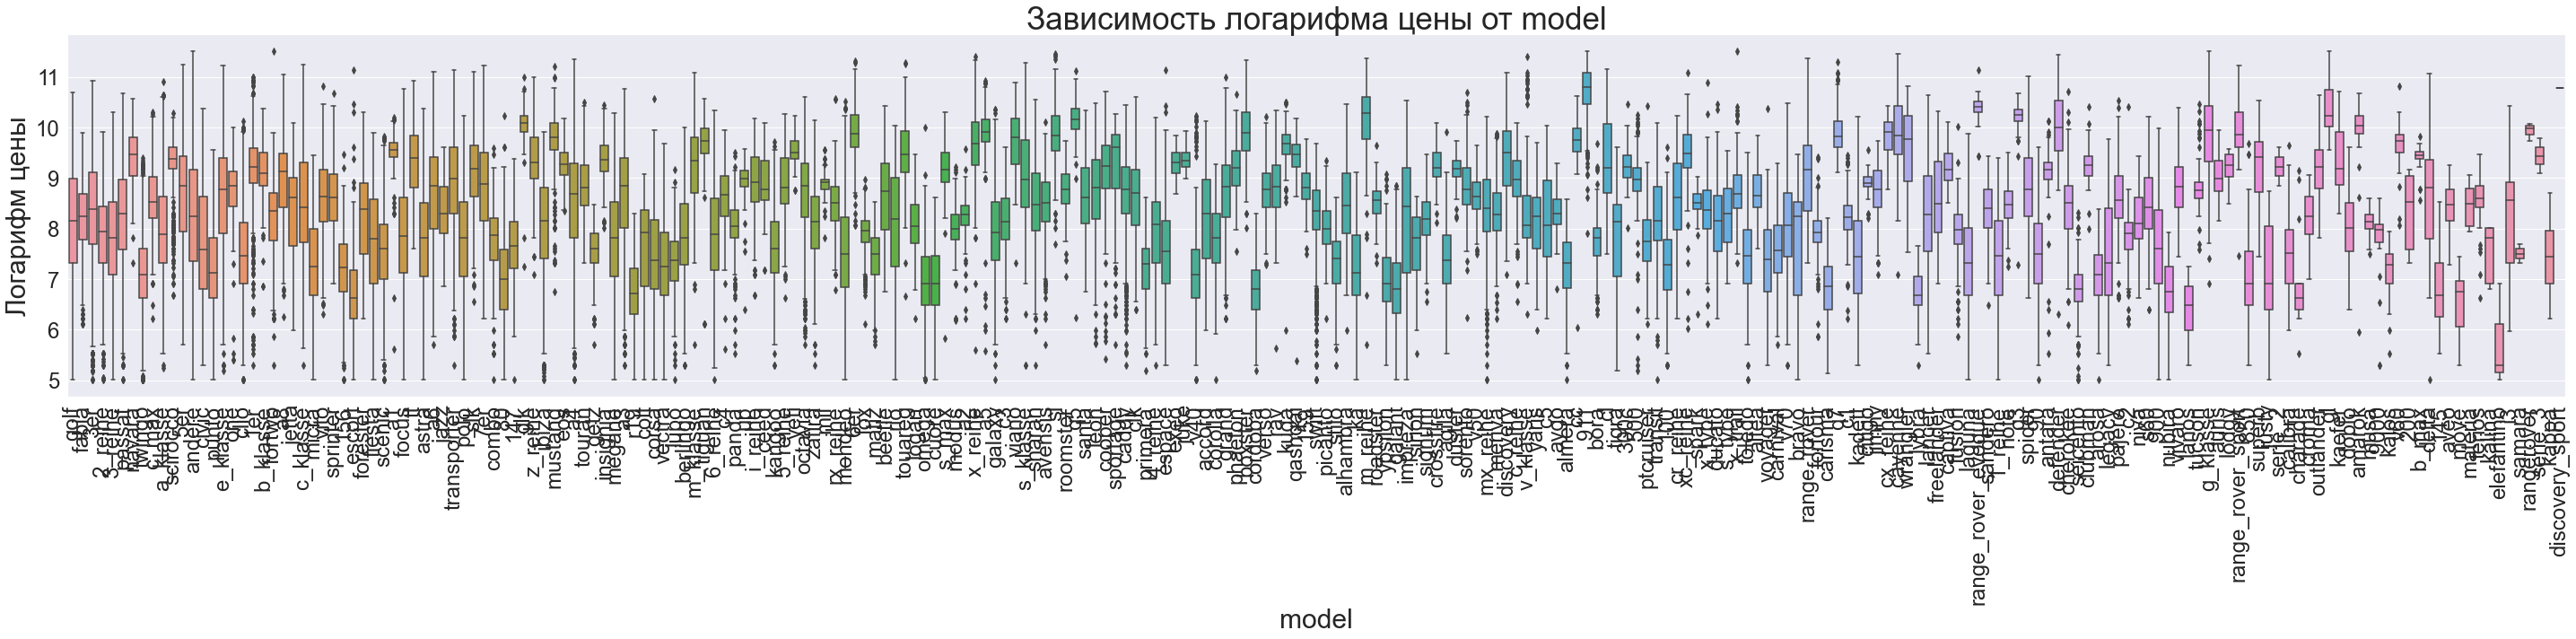

ГРАФИКИ ДЛЯ СЛЕДУЮЩЕГО ПРИЗНАКА


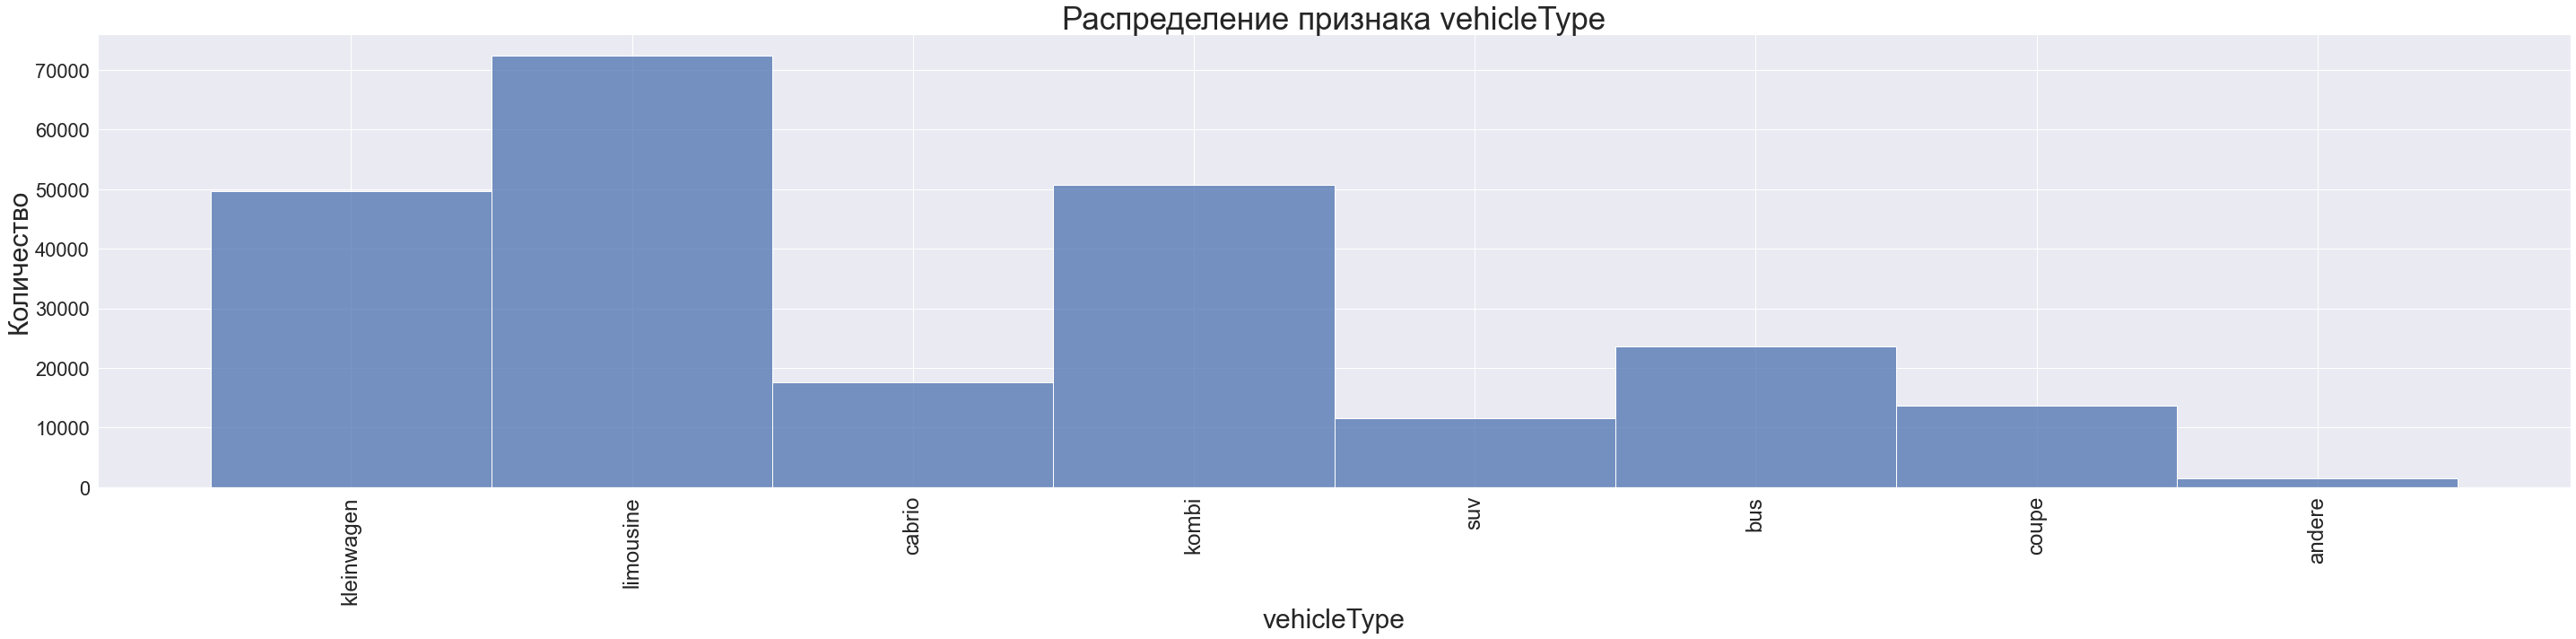

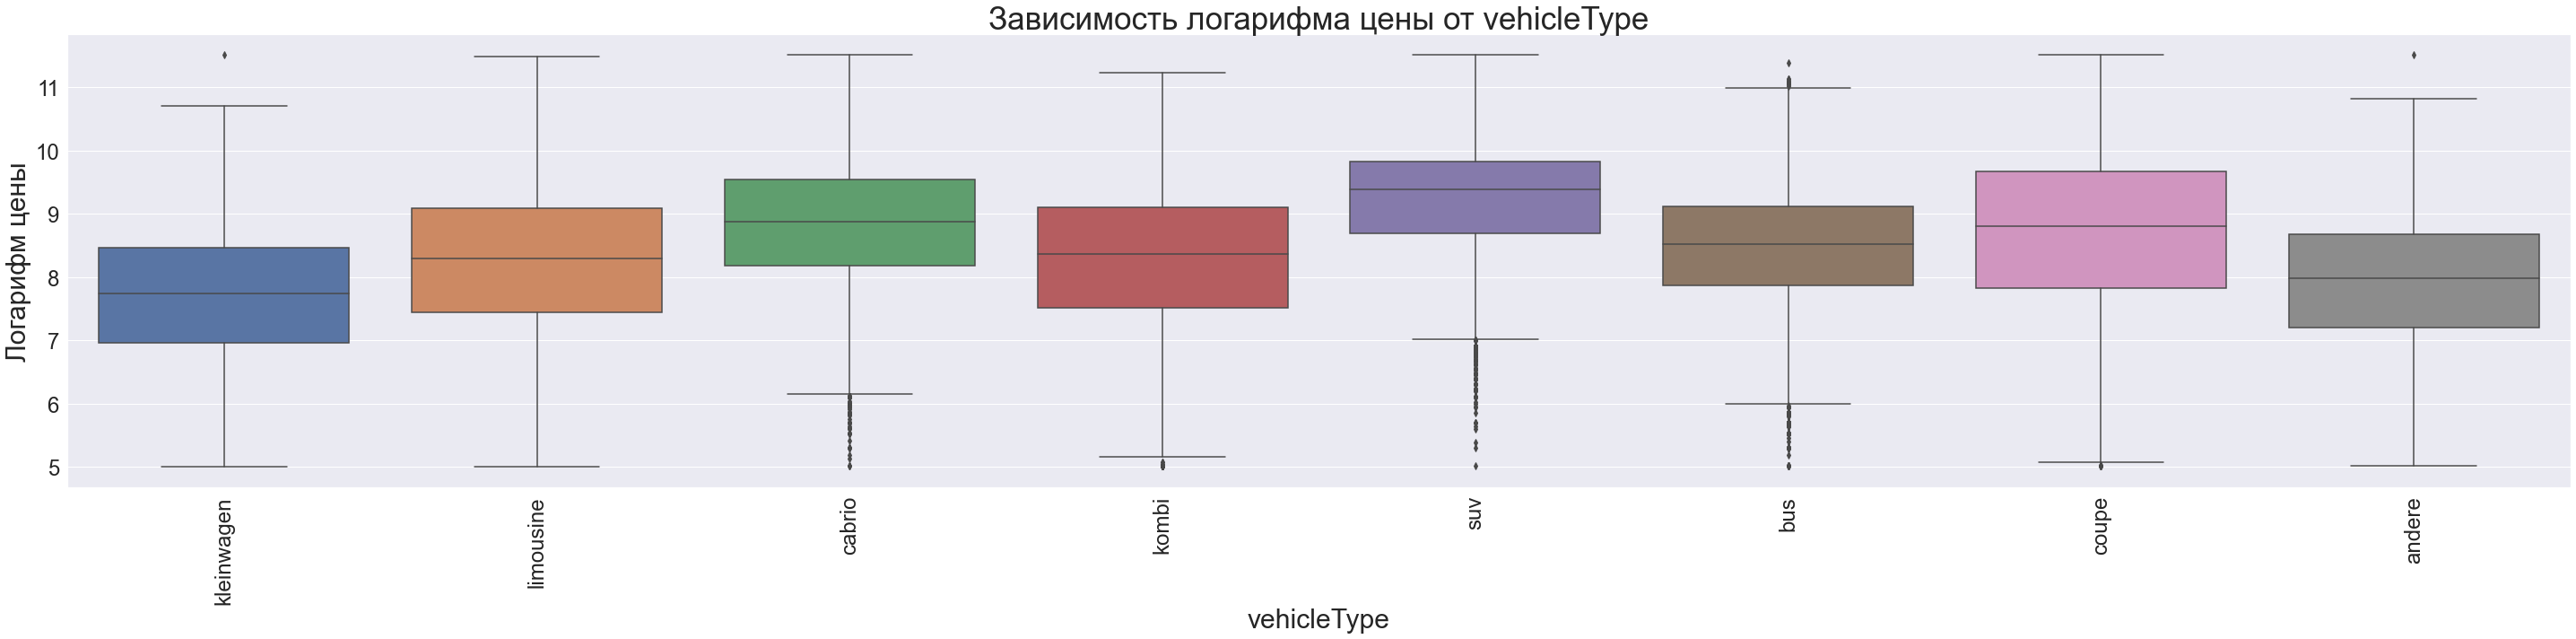

ГРАФИКИ ДЛЯ СЛЕДУЮЩЕГО ПРИЗНАКА


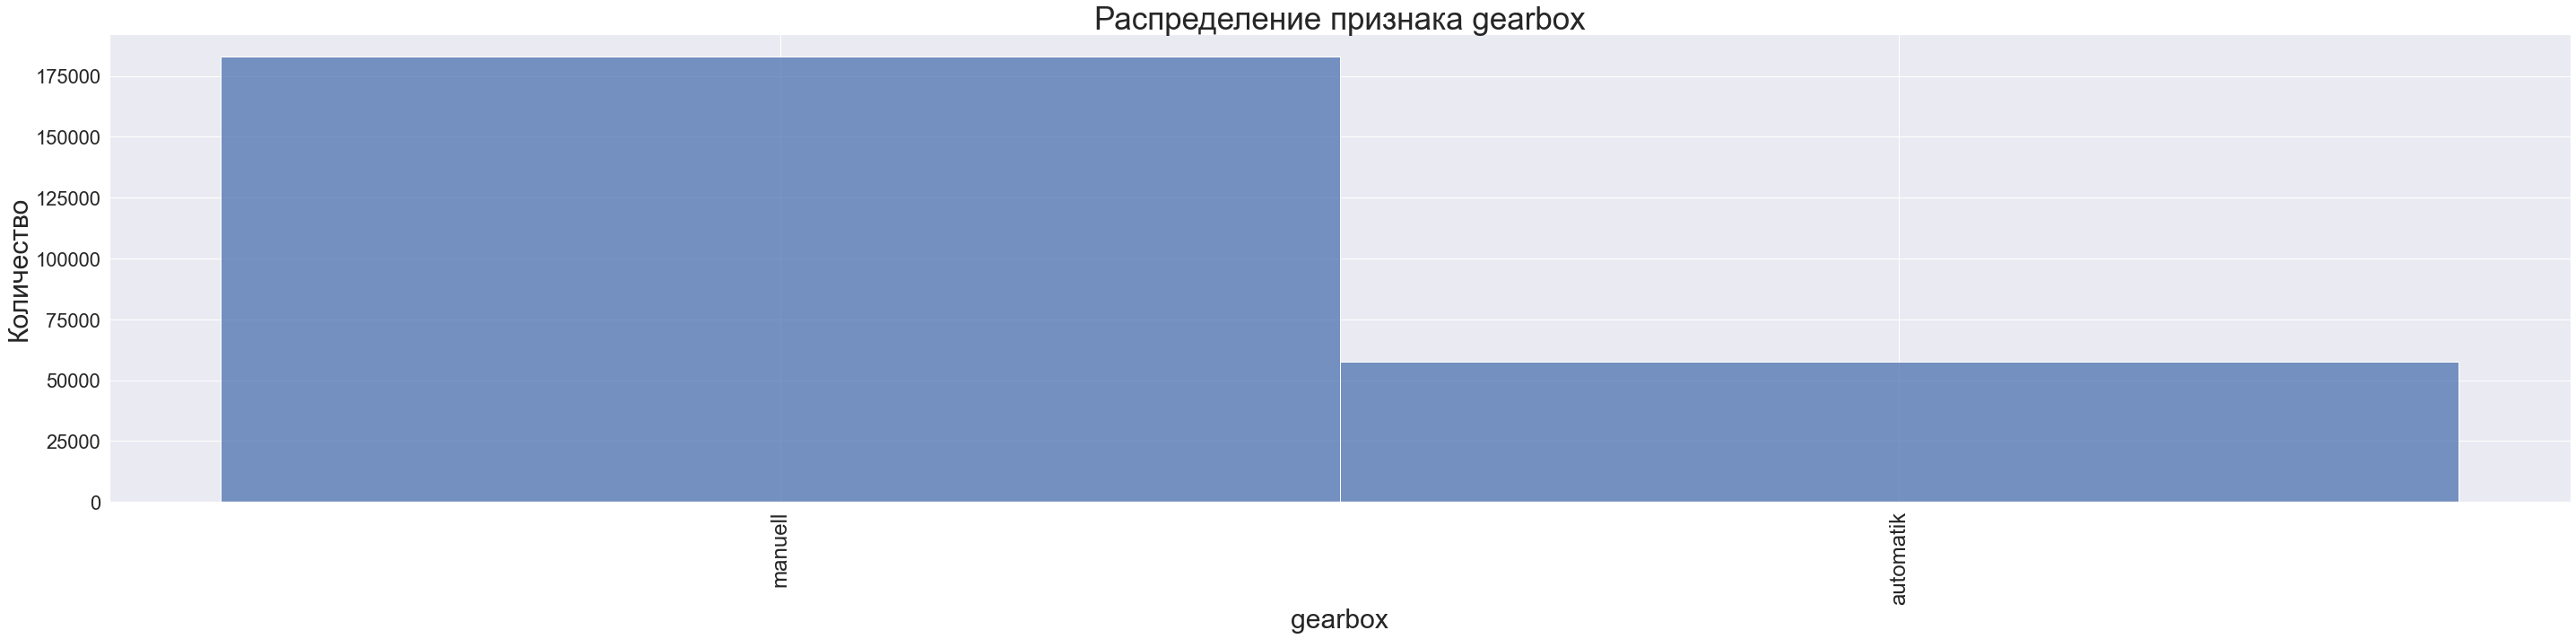

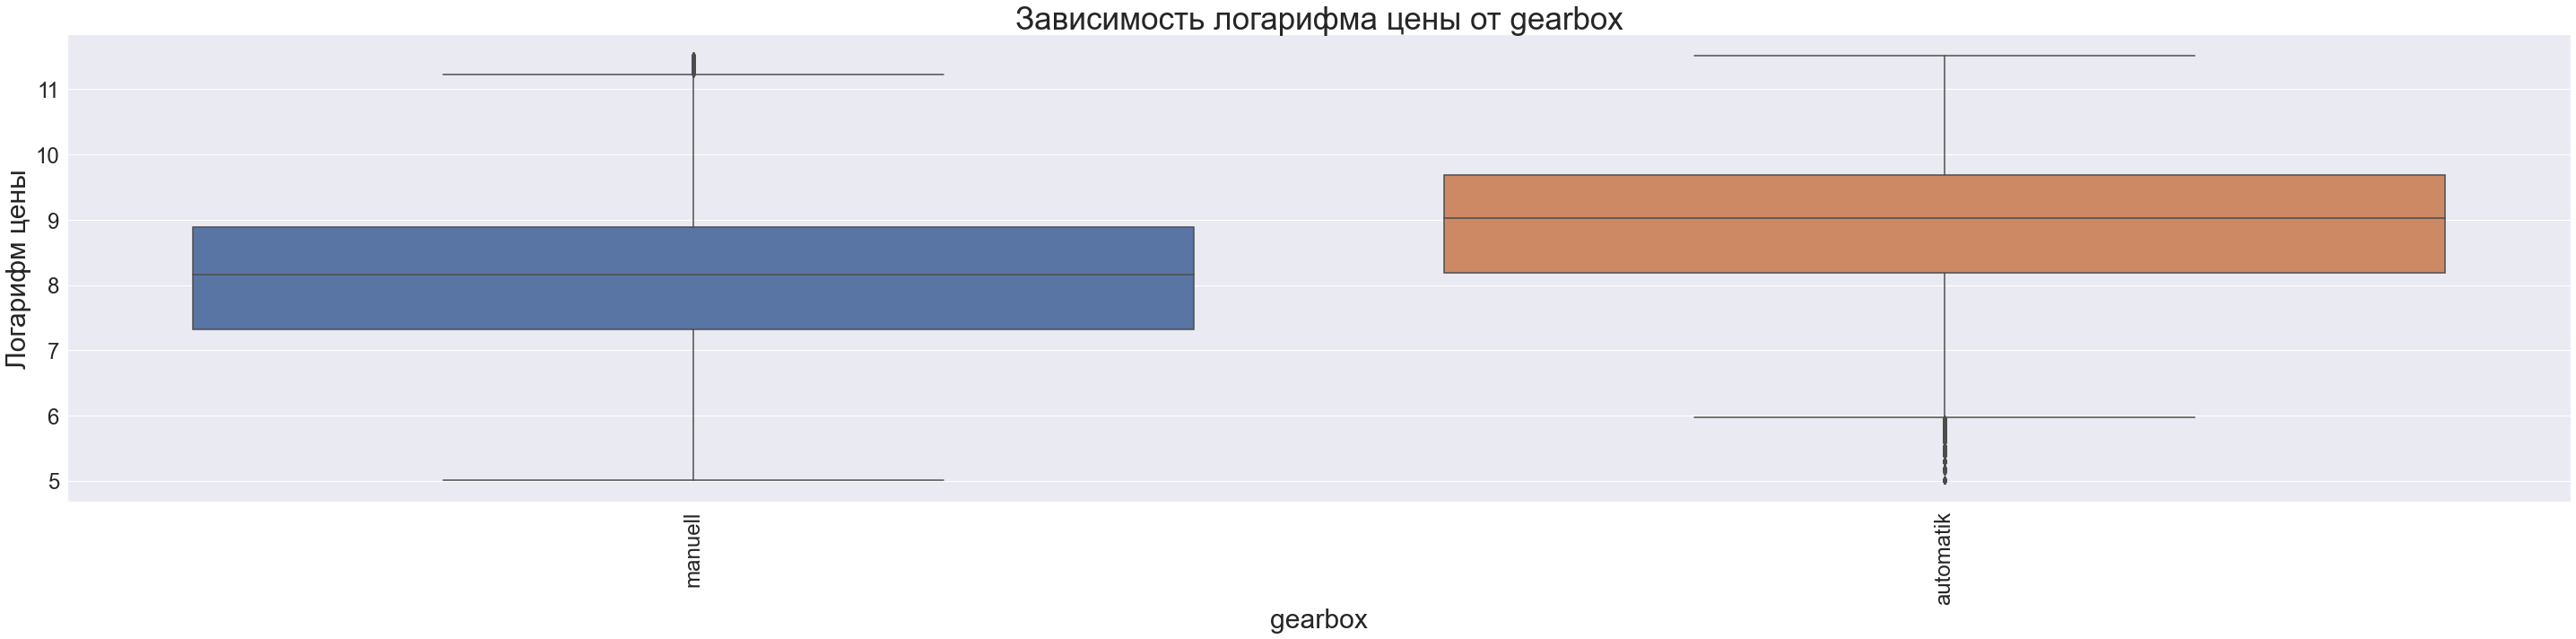

ГРАФИКИ ДЛЯ СЛЕДУЮЩЕГО ПРИЗНАКА


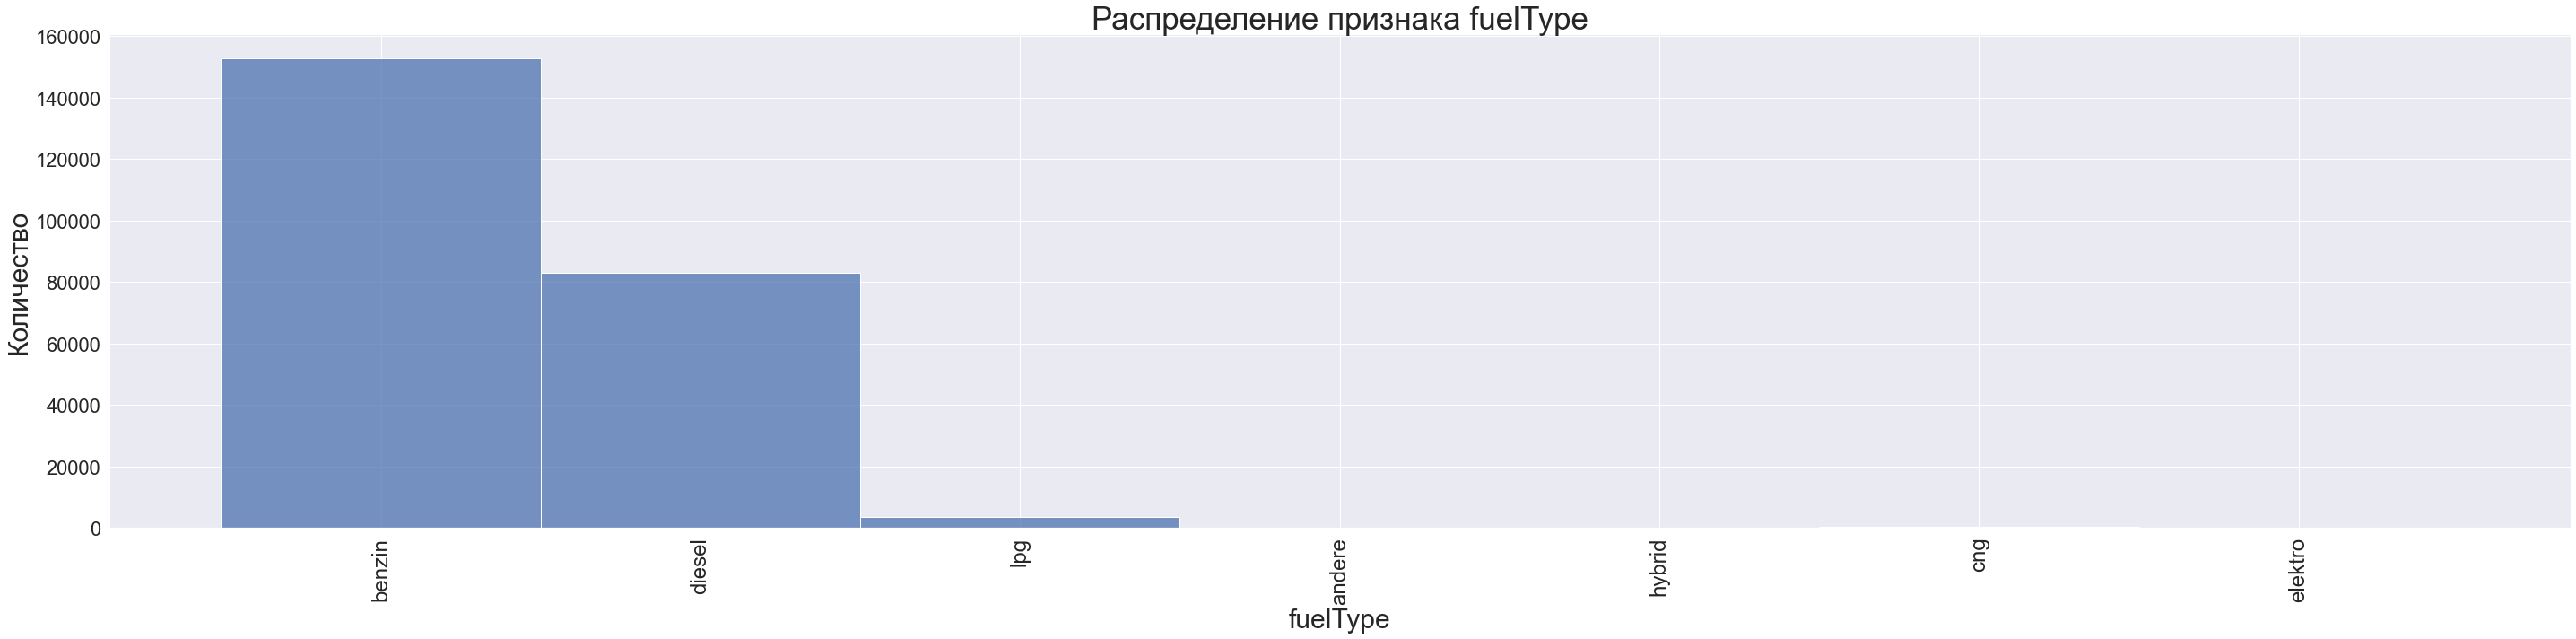

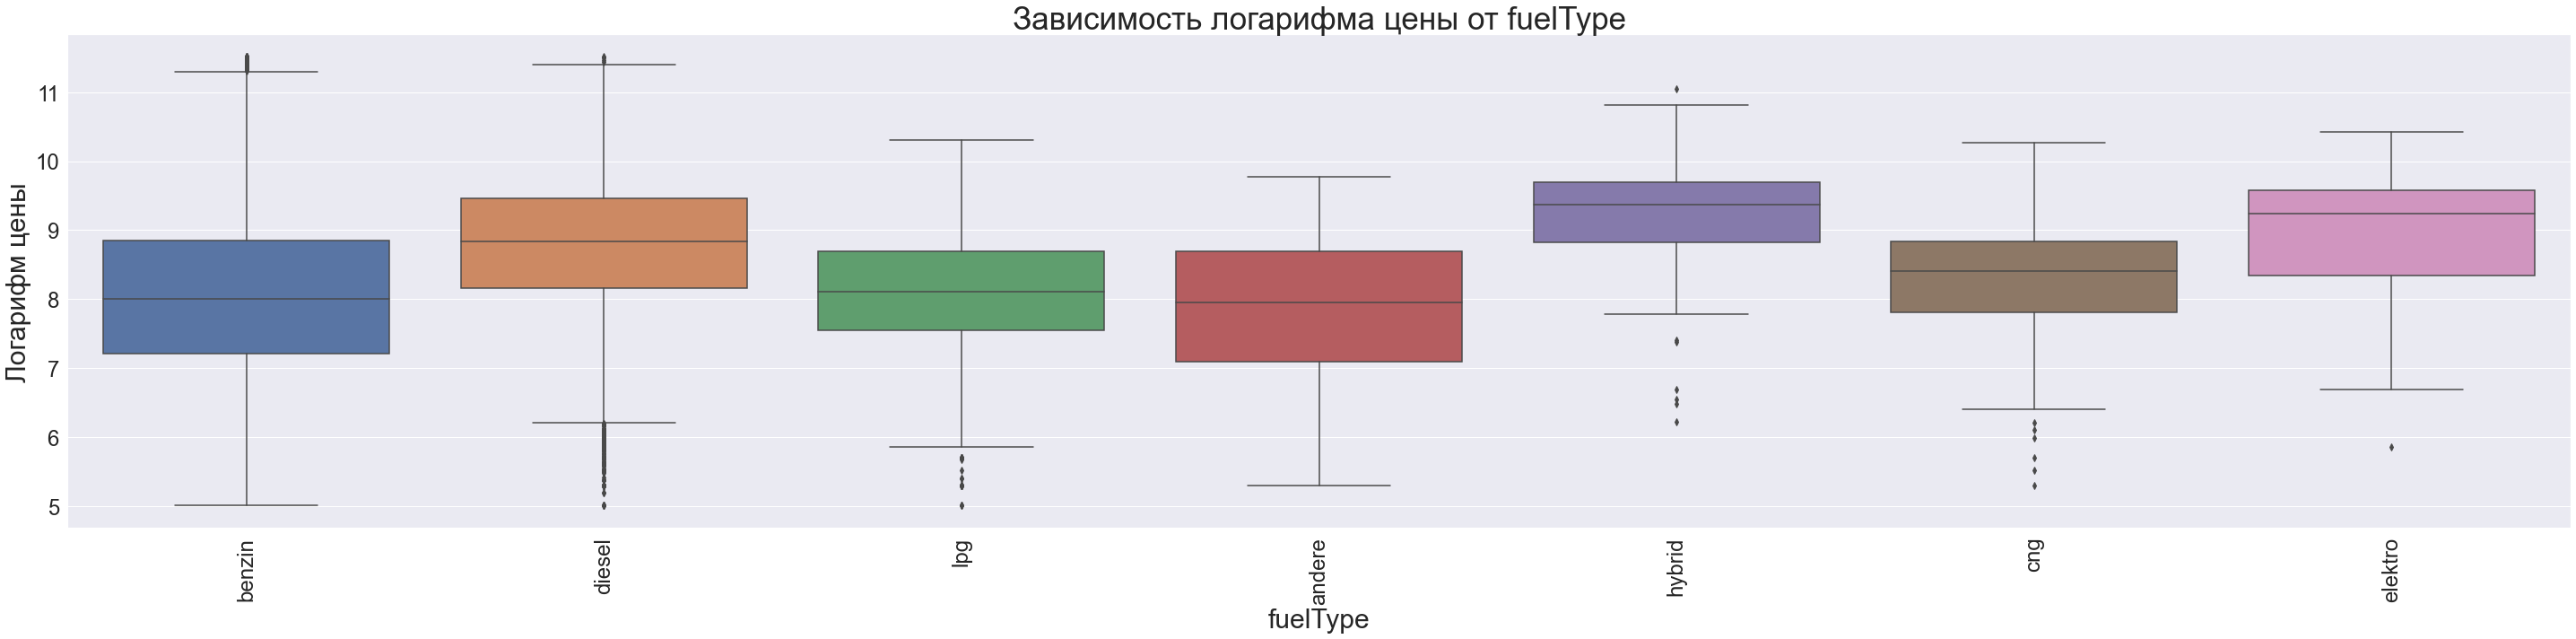

ГРАФИКИ ДЛЯ СЛЕДУЮЩЕГО ПРИЗНАКА


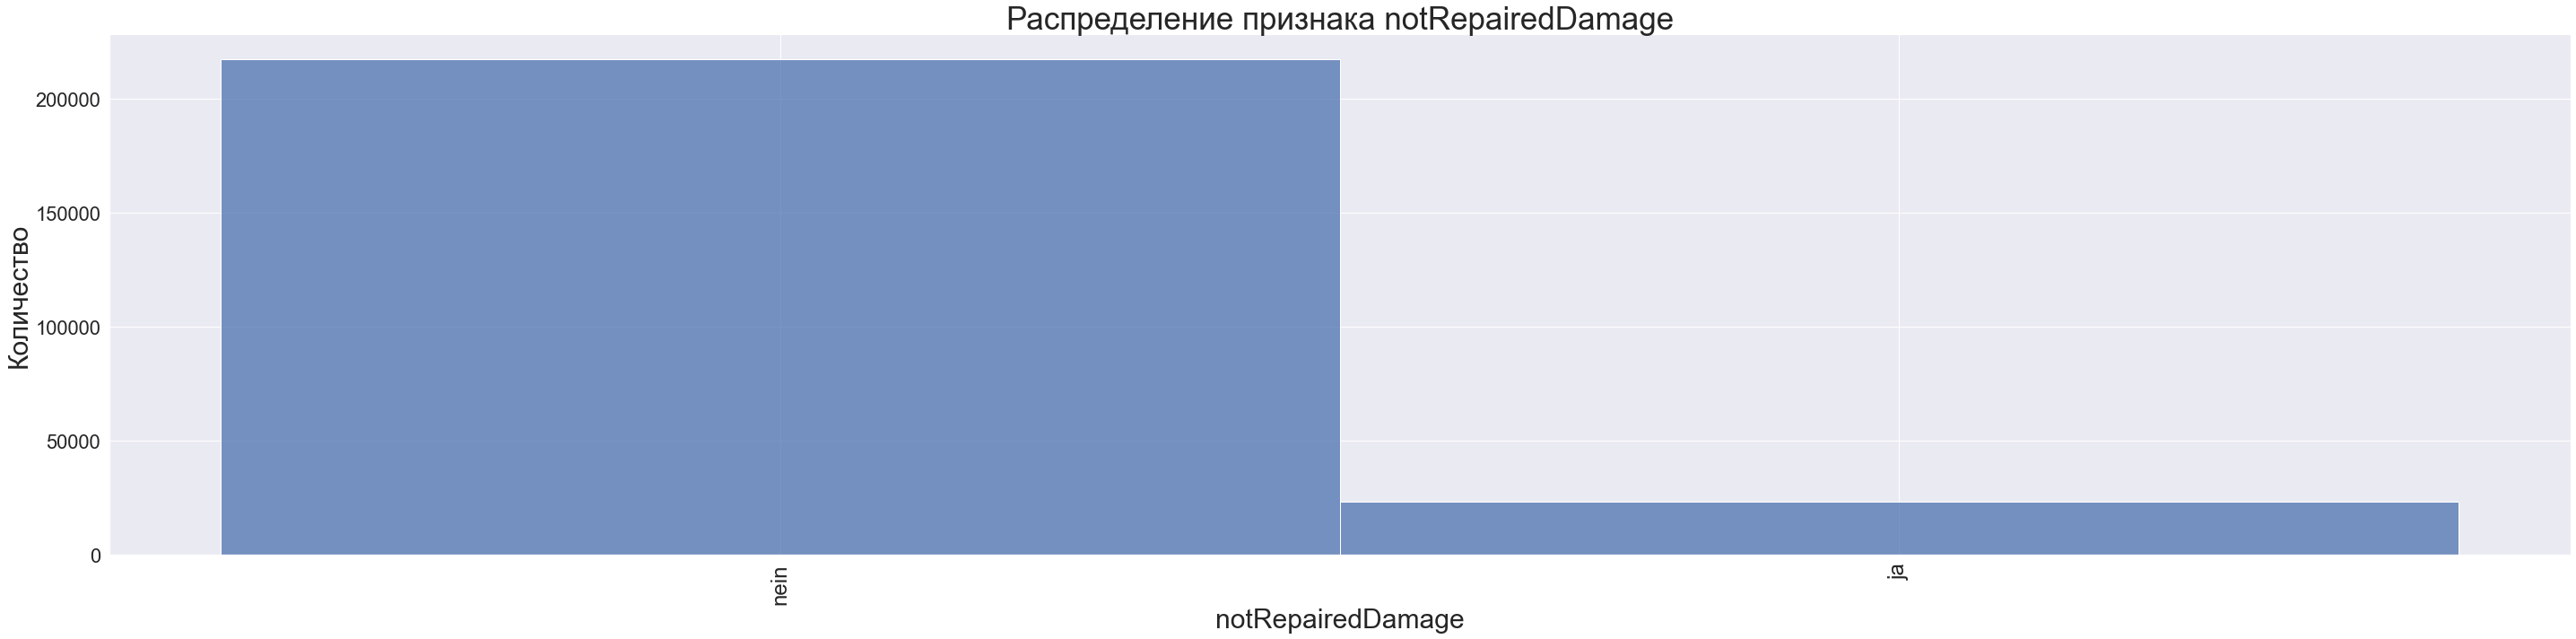

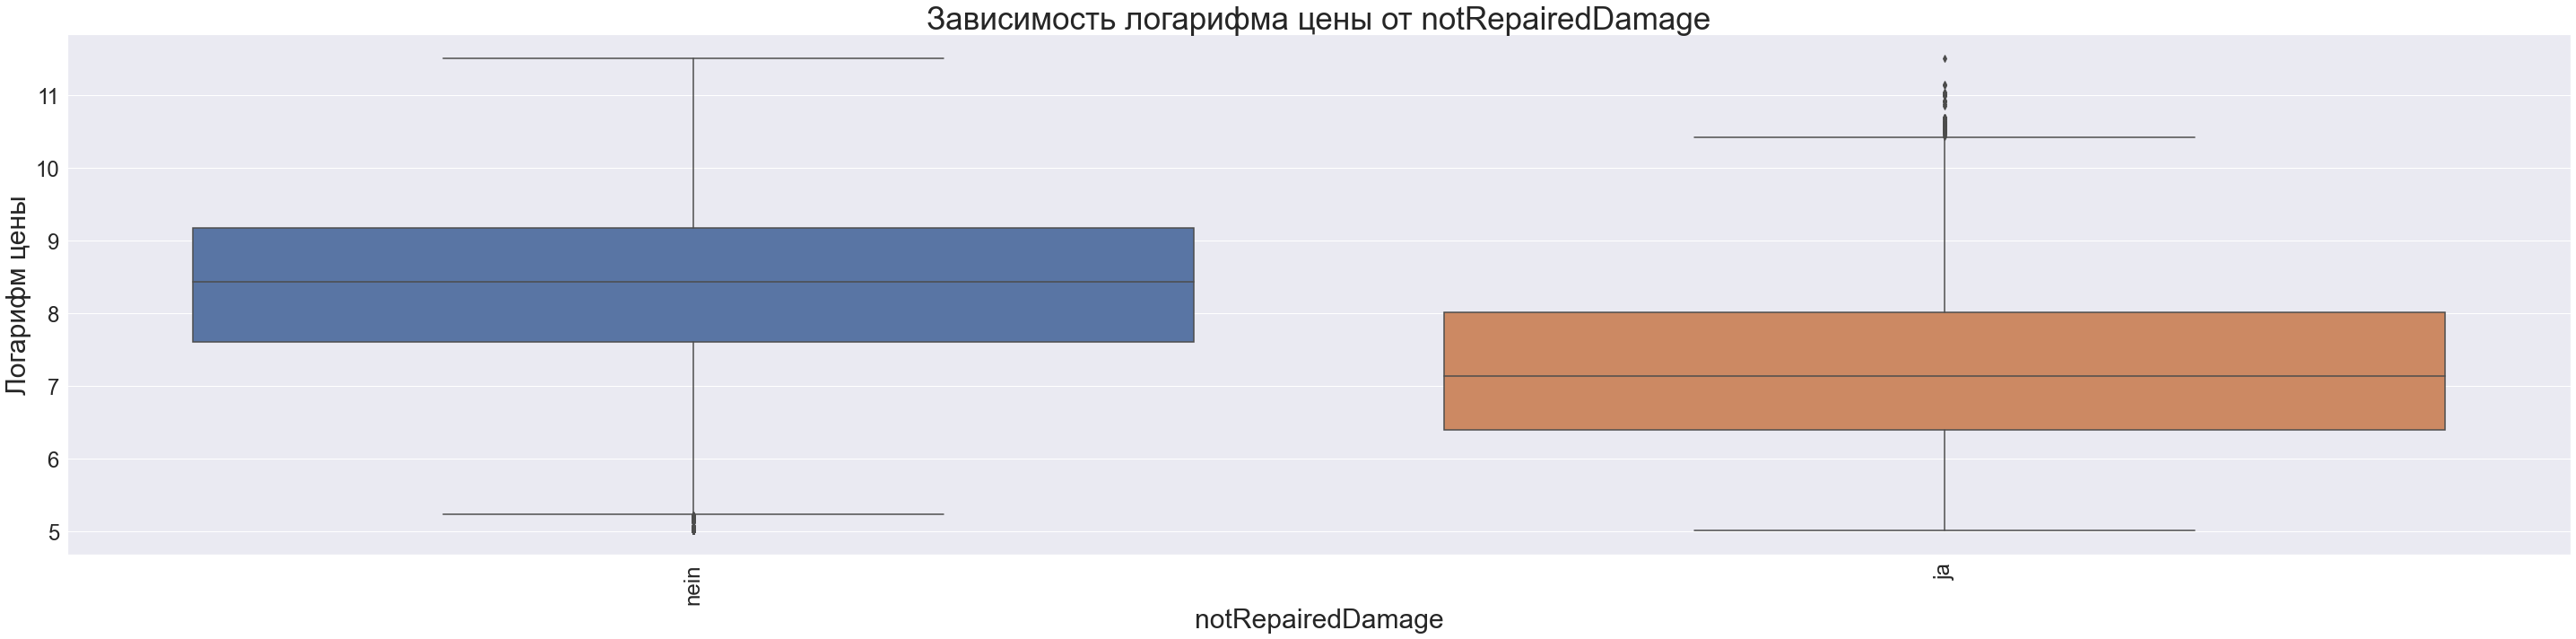

In [16]:
for i,feature in enumerate(categorical):
    plt.figure(figsize=(40, 10))
    sns.histplot(data[feature])
    plt.title(f'Распределение признака {feature}', fontsize=35)
    plt.xlabel(f'{feature}', fontsize=30)
    plt.ylabel('Количество', fontsize=30)
    plt.xticks(rotation=90)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=22)

    plt.tight_layout()
    plt.show()

    
    
    plt.figure(figsize=(40, 10))
    sns.boxplot(x=data[feature], y=data['log_price'])
    plt.title(f'Зависимость логарифма цены от {feature}', fontsize = 35)
    plt.ylabel('Логарифм цены', fontsize = 30)
    plt.xlabel(f'{feature}', fontsize = 30)
    plt.xticks(rotation=90)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    plt.tight_layout()
    plt.show()
    if i!=len(categorical)-1:
        print('ГРАФИКИ ДЛЯ СЛЕДУЮЩЕГО ПРИЗНАКА')

Теперь численные признаки

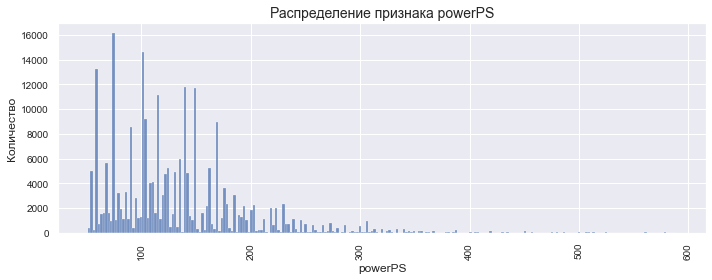

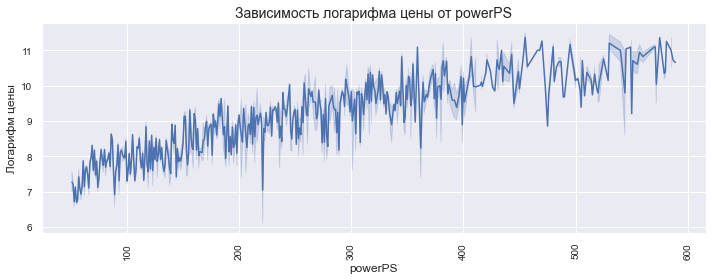

ГРАФИКИ ДЛЯ СЛЕДУЮЩЕГО ПРИЗНАКА


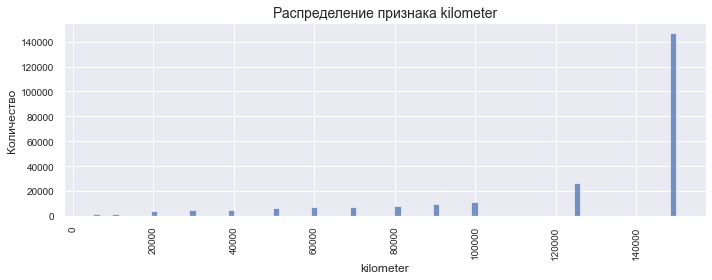

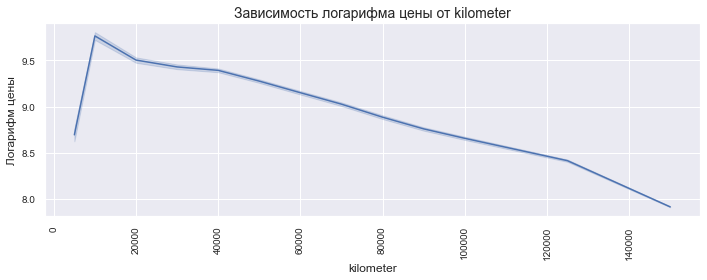

ГРАФИКИ ДЛЯ СЛЕДУЮЩЕГО ПРИЗНАКА


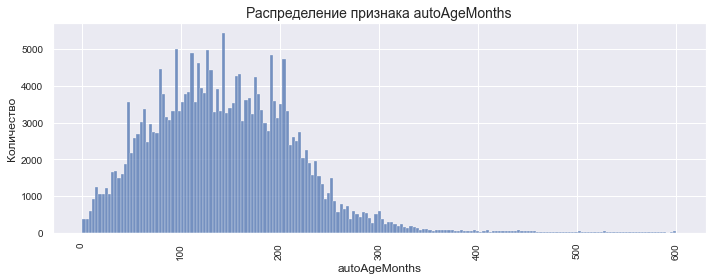

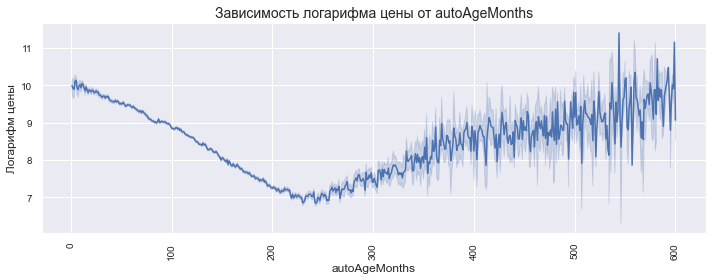

In [27]:
for i,feature in enumerate(numeric):
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature])
    plt.title(f'Распределение признака {feature}', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.xticks(rotation=90)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

    
    
    plt.figure(figsize=(10, 4))
    sns.lineplot(x=data[feature], y=data['log_price'])
    plt.title(f'Зависимость логарифма цены от {feature}', fontsize = 14)
    plt.ylabel('Логарифм цены', fontsize = 12)
    plt.xlabel(f'{feature}', fontsize = 12)
    plt.xticks(rotation=90)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()
    if i!=len(numeric)-1:
        print('ГРАФИКИ ДЛЯ СЛЕДУЮЩЕГО ПРИЗНАКА')

2) Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы


Численные думаю важны все, там четко прослеживается линейная связь (где-то положительная, где-то отрицательная).
Категориальные признаки тоже важны почти все кроме model. Очень много моделей, что даст очень сильного много признаков при кодировки. И сам по себе признак не очень важен, так как много моделей одной компании находятся в одном ценовом сегменте

3) Подумайте, какие трансформации признаков из известных вам будет уместно применить


Я думаю для категориальных подойдет OneHotEncoder, а для численных нормализация - StandardScaler

4) Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать


In [28]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []


In [29]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [31]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.2, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=10)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from linear_regression import LinearRegression
from sklearn.metrics import r2_score
from collections import defaultdict


def find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent_name):
    best_lr = None
    best_val_loss = np.inf
    best_r2 = -np.inf
    best_iters = 0
    results = {}
    best_loss = None
    lyambdas = np.logspace(-8, 0.6, 10)
    for lr in lyambdas:
        print(f'{descent_name} descent for lr={lr}')
        
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lr
            }
        }
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        train_loss = model.calc_loss(X_train, y_train)
        val_loss = model.calc_loss(X_val, y_val)
        test_loss = model.calc_loss(X_test, y_test)
        
        val_r2 = r2_score(y_val, model.predict(X_val))
        test_r2 = r2_score(y_test, model.predict(X_test))
        
        iters = len(model.loss_history)
        
        print(f'Train loss: {train_loss}, Val loss: {val_loss}, Test loss: {test_loss}')
        print(f'R^2 Val: {val_r2}, R^2 Test: {test_r2}')
        print(f'iter: {iters}\n')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lr = lr
            best_r2 = val_r2
            best_iters = iters
            best_loss = model.loss_history
            
        results[lr] = {
            'train_loss': train_loss,
            'val_loss': val_loss,
            'test_loss': test_loss,
            'val_r2': val_r2,
            'test_r2': test_r2,
            'cnt_iters': iters
        }
        
    print(f'\nBest lr for {descent_name} descent: {best_lr}')
    print(f"Train loss: {results[best_lr]['train_loss']}, Val loss: {best_val_loss}, Test loss: {results[best_lr]['test_loss']}")
    print(f"R^2 Val: {best_r2}, R^2 Test: {results[best_lr]['test_r2']}")
    print(f'Count iters: {best_iters}\n')
    print('--------------------')
    
    return best_lr, results[best_lr], best_loss


descents = ['full', 'stochastic', 'momentum', 'adam']
res = {}
best_lr = {}
all_loss = {}

for descent in descents:
    best_lr[descent], res[descent], all_loss[descent] = find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent)



full descent for lr=1e-08
Train loss: 33.98758872350636, Val loss: 33.945301094510214, Test loss: 34.02026578719778
R^2 Val: -26.674216385602588, R^2 Test: -26.487287348382704
iter: 2

full descent for lr=9.027251779484579e-08
Train loss: 27.919965880240753, Val loss: 27.805677326335573, Test loss: 27.948946061211206
R^2 Val: -21.66883209946549, R^2 Test: -21.58185507057559
iter: 2

full descent for lr=8.149127469020748e-07
Train loss: 26.9390301605623, Val loss: 26.850617392280892, Test loss: 26.93757346217037
R^2 Val: -20.890210775628628, R^2 Test: -20.764698337585646
iter: 2

full descent for lr=7.356422544596406e-06
Train loss: 31.422614405146312, Val loss: 31.289438643957535, Test loss: 31.44447604654706
R^2 Val: -24.509000294504844, R^2 Test: -24.406131569261017
iter: 2

full descent for lr=6.640827850634837e-05
Train loss: 23.388206564196047, Val loss: 23.246745984400697, Test loss: 23.406280376523046
R^2 Val: -17.95212173379385, R^2 Test: -17.91152639696336
iter: 2

full descen

Train loss: 1.1306903604068401, Val loss: 1.1210413757870392, Test loss: 1.1368711290440647
R^2 Val: 0.08606079161390956, R^2 Test: 0.08144446614305878
iter: 150

adam descent for lr=0.4410059454176732
Train loss: 0.29797141970957225, Val loss: 0.2925188006233632, Test loss: 0.2917214911640916
R^2 Val: 0.761521379269277, R^2 Test: 0.7642983595870796
iter: 83

adam descent for lr=3.9810717055349722
Train loss: 0.30010135782988645, Val loss: 0.2940835108091448, Test loss: 0.293980293372869
R^2 Val: 0.7602457350161442, R^2 Test: 0.762473319601672
iter: 92


Best lr for adam descent: 0.4410059454176732
Train loss: 0.29797141970957225, Val loss: 0.2925188006233632, Test loss: 0.2917214911640916
R^2 Val: 0.761521379269277, R^2 Test: 0.7642983595870796
Count iters: 83

--------------------


In [33]:
best_lr

{'full': 0.4410059454176732,
 'stochastic': 0.4410059454176732,
 'momentum': 0.4410059454176732,
 'adam': 0.4410059454176732}

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

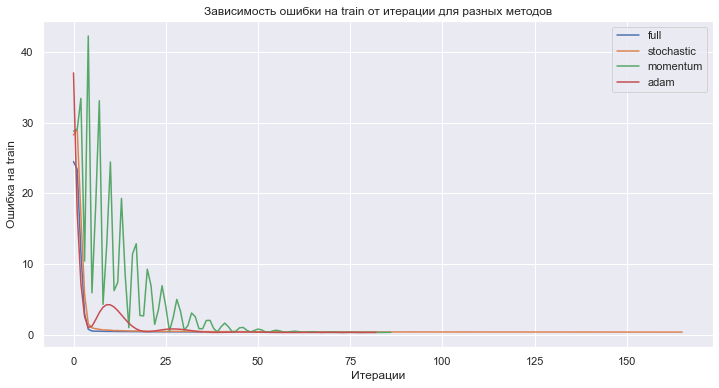

In [34]:
plt.figure(figsize=(12, 6))
for descent, loss in all_loss.items():
    plt.plot(loss, label=descent)


plt.title('Зависимость ошибки на train от итерации для разных методов')
plt.xlabel('Итерации')
plt.ylabel('Ошибка на train')
plt.legend()
plt.show()

Можно посмотреть на логарифмическую ошибку.

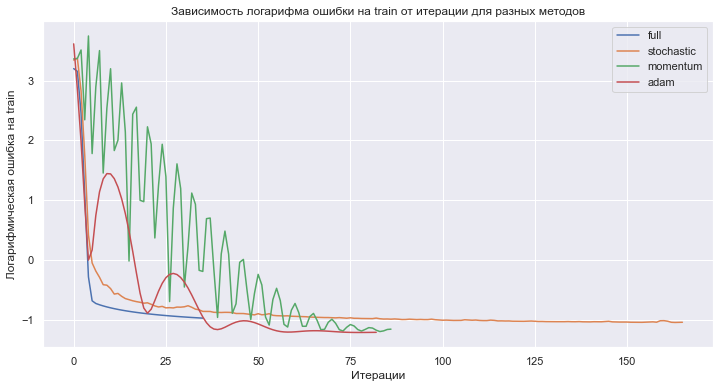

In [35]:
plt.figure(figsize=(12, 6))
for descent, loss in all_loss.items():
    plt.plot(np.log(loss), label=descent)


plt.title('Зависимость логарифма ошибки на train от итерации для разных методов')
plt.xlabel('Итерации')
plt.ylabel('Логарифмическая ошибка на train')
plt.legend()
plt.show()

In [36]:
table = pd.DataFrame.from_dict(res, orient='index')
table

train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.377868  0.372561   0.368532  0.696266  0.702238         36
stochastic    0.352656  0.346207   0.346241  0.717752  0.720249        166
momentum      0.314304  0.310013   0.308514  0.747259  0.750730         87
adam          0.297971  0.292519   0.291721  0.761521  0.764298         83

`### ваше решение тут ###`

Меньше всего итераций требуется полному градиентному спуску. Больше всего стохастичсекому, скорее всего происходит из-за того, что возле мимнимума градиент сильно скачет. Также видно, что momentum и adam убывают не монотонно. Еще лучший r^2 у adam.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [37]:
import time

batch_sizes = np.arange(5, 500, 10)

k = 10  

iter_cnt = []
all_batch_times = []

for batch in batch_sizes:
    iter_cnt_tmp = 0
    time_tmp = 0
    for i in range(k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': best_lr['stochastic'],
                'batch_size': batch
            }
        }
        model = LinearRegression(descent_config=descent_config)

        t_st = time.time()
        model.fit(X_train, y_train)
        t_fin = time.time()
        
        iter_cnt_tmp += len(model.loss_history)
        time_tmp += (t_fin - t_st)
        print(f"Batch size: {batch}, iters: {len(model.loss_history)}, time: {t_fin - t_st} seconds")

    
    iter_cnt.append(iter_cnt_tmp / k)
    all_batch_times.append(time_tmp / k)

    print(f"\nBatch size: {batch}\navg iters: {iter_cnt[-1]}\navg time: {all_batch_times[-1]} seconds")
    print('----------------')


Batch size: 5, iters: 301, time: 2.825374126434326 seconds
Batch size: 5, iters: 241, time: 2.240217924118042 seconds
Batch size: 5, iters: 301, time: 2.805116891860962 seconds
Batch size: 5, iters: 166, time: 1.5433928966522217 seconds
Batch size: 5, iters: 238, time: 2.2192063331604004 seconds
Batch size: 5, iters: 221, time: 2.059898853302002 seconds
Batch size: 5, iters: 150, time: 1.3963661193847656 seconds
Batch size: 5, iters: 176, time: 1.6369259357452393 seconds
Batch size: 5, iters: 128, time: 1.1918950080871582 seconds
Batch size: 5, iters: 301, time: 2.7938828468322754 seconds

Batch size: 5
avg iters: 222.3
avg time: 2.071227693557739 seconds
----------------
Batch size: 15, iters: 94, time: 0.8715560436248779 seconds
Batch size: 15, iters: 262, time: 2.422534942626953 seconds
Batch size: 15, iters: 168, time: 1.5590360164642334 seconds
Batch size: 15, iters: 298, time: 2.75655198097229 seconds
Batch size: 15, iters: 218, time: 2.0200440883636475 seconds
Batch size: 15, it

Batch size: 125, iters: 95, time: 0.8943228721618652 seconds
Batch size: 125, iters: 86, time: 0.8187901973724365 seconds
Batch size: 125, iters: 100, time: 0.942490816116333 seconds
Batch size: 125, iters: 116, time: 1.1136679649353027 seconds
Batch size: 125, iters: 95, time: 0.9766747951507568 seconds
Batch size: 125, iters: 70, time: 0.6695590019226074 seconds
Batch size: 125, iters: 88, time: 0.8457379341125488 seconds
Batch size: 125, iters: 85, time: 0.8085412979125977 seconds
Batch size: 125, iters: 93, time: 0.8921952247619629 seconds
Batch size: 125, iters: 99, time: 0.9499459266662598 seconds

Batch size: 125
avg iters: 92.7
avg time: 0.8911926031112671 seconds
----------------
Batch size: 135, iters: 76, time: 0.7132070064544678 seconds
Batch size: 135, iters: 73, time: 0.7004079818725586 seconds
Batch size: 135, iters: 67, time: 0.636965274810791 seconds
Batch size: 135, iters: 99, time: 0.9314100742340088 seconds
Batch size: 135, iters: 73, time: 0.700214147567749 seconds

Batch size: 235, iters: 85, time: 0.7899050712585449 seconds

Batch size: 235
avg iters: 73.8
avg time: 0.6860450744628906 seconds
----------------
Batch size: 245, iters: 77, time: 0.716865062713623 seconds
Batch size: 245, iters: 71, time: 0.6619560718536377 seconds
Batch size: 245, iters: 73, time: 0.6784203052520752 seconds
Batch size: 245, iters: 69, time: 0.6423461437225342 seconds
Batch size: 245, iters: 71, time: 0.660987138748169 seconds
Batch size: 245, iters: 66, time: 0.6130580902099609 seconds
Batch size: 245, iters: 53, time: 0.4934811592102051 seconds
Batch size: 245, iters: 68, time: 0.6320030689239502 seconds
Batch size: 245, iters: 68, time: 0.6334772109985352 seconds
Batch size: 245, iters: 83, time: 0.7705259323120117 seconds

Batch size: 245
avg iters: 69.9
avg time: 0.6503120183944702 seconds
----------------
Batch size: 255, iters: 46, time: 0.4282829761505127 seconds
Batch size: 255, iters: 82, time: 0.762948751449585 seconds
Batch size: 255, iters: 63, time: 0.

Batch size: 355, iters: 63, time: 0.5912680625915527 seconds
Batch size: 355, iters: 49, time: 0.4623868465423584 seconds
Batch size: 355, iters: 61, time: 0.5703442096710205 seconds

Batch size: 355
avg iters: 60.1
avg time: 0.5620898723602294 seconds
----------------
Batch size: 365, iters: 49, time: 0.4579958915710449 seconds
Batch size: 365, iters: 57, time: 0.5331459045410156 seconds
Batch size: 365, iters: 57, time: 0.536395788192749 seconds
Batch size: 365, iters: 53, time: 0.5013267993927002 seconds
Batch size: 365, iters: 58, time: 0.5433459281921387 seconds
Batch size: 365, iters: 77, time: 0.7330307960510254 seconds
Batch size: 365, iters: 67, time: 0.6311450004577637 seconds
Batch size: 365, iters: 49, time: 0.4592761993408203 seconds
Batch size: 365, iters: 43, time: 0.4098799228668213 seconds
Batch size: 365, iters: 44, time: 0.41130995750427246 seconds

Batch size: 365
avg iters: 55.4
avg time: 0.5216852188110351 seconds
----------------
Batch size: 375, iters: 60, time:

Batch size: 475, iters: 38, time: 0.3555171489715576 seconds
Batch size: 475, iters: 47, time: 0.4396858215332031 seconds
Batch size: 475, iters: 47, time: 0.4387779235839844 seconds
Batch size: 475, iters: 48, time: 0.44861912727355957 seconds
Batch size: 475, iters: 47, time: 0.43941593170166016 seconds

Batch size: 475
avg iters: 49.3
avg time: 0.4605154037475586 seconds
----------------
Batch size: 485, iters: 68, time: 0.6364059448242188 seconds
Batch size: 485, iters: 64, time: 0.598811149597168 seconds
Batch size: 485, iters: 48, time: 0.44721293449401855 seconds
Batch size: 485, iters: 52, time: 0.48465895652770996 seconds
Batch size: 485, iters: 59, time: 0.5530819892883301 seconds
Batch size: 485, iters: 56, time: 0.522413969039917 seconds
Batch size: 485, iters: 57, time: 0.5311479568481445 seconds
Batch size: 485, iters: 42, time: 0.3921070098876953 seconds
Batch size: 485, iters: 58, time: 0.5424091815948486 seconds
Batch size: 485, iters: 45, time: 0.42624902725219727 sec

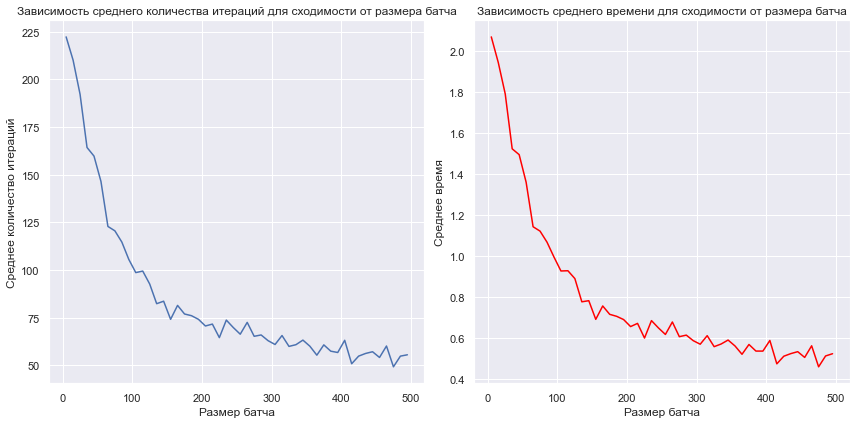

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, iter_cnt)
plt.title('Зависимость среднего количества итераций для сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итераций')

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, all_batch_times, color='red')
plt.title('Зависимость среднего времени для сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время')

plt.tight_layout()
plt.show()

`### ваше решение тут ###`

Очевидно, что увеличении батча падает количество итераций до сходимости, а также время до сходимости. Это происходит из-за того, что при увеличении размера батча шаги градиента направлены в сторону минимума, а для меньших батчей они могут "скакать". Также можно заметить, что размер батча около 200 позволит уже быстро сходиться, так как примерно до размера 200 происходит большой скачок вниз в кол-ве итераций до сходимости, потом уже не такой большой скачок

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:https://contest.yandex.ru/contest/54610/run-report/95797356/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [44]:

def find_lr_mu(X_train, y_train, X_val, y_val, X_test, y_test, descent_name):
    best_params = None
    best_val_loss = np.inf
    best_r2 = -np.inf
    best_iters = 0
    best_loss_hist = None
    results = {}
    lyambdas = np.logspace(-5, 0.6, 7)
    mus = np.logspace(-4, 0.3, 6)
    
    for lr in lyambdas:
        for mu in mus:
            print(f'{descent_name} descent for lr={lr}, mu={mu}')
            
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': X_train.shape[1],
                    'lambda_': lr,
                    'mu': mu
                }
            }
            model = LinearRegression(descent_config=descent_config)
            model.fit(X_train, y_train)
            
            train_loss = model.calc_loss(X_train, y_train)
            val_loss = model.calc_loss(X_val, y_val)
            test_loss = model.calc_loss(X_test, y_test)
            
            val_r2 = r2_score(y_val, model.predict(X_val))
            test_r2 = r2_score(y_test, model.predict(X_test))
            
            iters = len(model.loss_history)
            
            print(f'Train loss: {train_loss}, Val loss: {val_loss}, Test loss: {test_loss}')
            print(f'R^2 Val: {val_r2}, R^2 Test: {test_r2}')
            print(f'iter: {iters}\n')
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_params = (lr, mu)
                best_r2 = val_r2
                best_iters = iters
                best_loss_hist = model.loss_history
                
            results[(lr, mu)] = {
                'train_loss': train_loss,
                'val_loss': val_loss,
                'test_loss': test_loss,
                'val_r2': val_r2,
                'test_r2': test_r2,
                'cnt_iters': iters,
            }
                
    print(f'\nBest params for {descent_name} descent: lr={best_params[0]}, mu={best_params[1]}')
    print(f"Train loss: {results[best_params]['train_loss']}, Val loss: {best_val_loss}, Test loss: {results[best_params]['test_loss']}")
    print(f"R^2 Val: {best_r2}, R^2 Test: {results[best_params]['test_r2']}")
    print(f'Count iters: {best_iters}\n')
    print('--------------------')
    
    return best_params, results[best_params], best_loss_hist


descents = ['full', 'stochastic', 'momentum', 'adam']
reg_loss_history = defaultdict(dict)
res_reg = defaultdict(dict)
best_params_reg = defaultdict(dict)

for descent in descents:
    best_params_reg[descent], res_reg[descent], reg_loss_history[descent] = find_lr_mu(
        X_train, y_train, X_val, y_val, X_test, y_test, descent)


full descent for lr=1e-05, mu=0.0001
Train loss: 25.020045702597265, Val loss: 24.93061416751267, Test loss: 24.990005350672725
R^2 Val: -19.324910631277174, R^2 Test: -19.19112555464084
iter: 2

full descent for lr=1e-05, mu=0.0007244359600749898
Train loss: 32.97322210736935, Val loss: 32.84816266892751, Test loss: 33.02080420531373
R^2 Val: -25.779764275426864, R^2 Test: -25.67975433653734
iter: 2

full descent for lr=1e-05, mu=0.005248074602497723
Train loss: 29.847629425509393, Val loss: 29.743309932663127, Test loss: 29.88899465343961
R^2 Val: -23.248504757958422, R^2 Test: -23.1493523223012
iter: 2

full descent for lr=1e-05, mu=0.038018939632056124
Train loss: 30.44359333918574, Val loss: 30.326028015862573, Test loss: 30.392118977363637
R^2 Val: -23.72357099117186, R^2 Test: -23.555860694404068
iter: 2

full descent for lr=1e-05, mu=0.2754228703338166
Train loss: 33.29648258459225, Val loss: 33.060846508632316, Test loss: 33.3423668495932
R^2 Val: -25.95315671596891, R^2 Test:

Train loss: 2.6319546522311963e+84, Val loss: 2.6166333446266315e+84, Test loss: 2.6973367734739095e+84
R^2 Val: -2.1332342046213703e+84, R^2 Test: -2.1793618965709995e+84
iter: 301

full descent for lr=3.9810717055349722, mu=0.005248074602497723
Train loss: 6.050182694958909e+83, Val loss: 6.02519007411897e+83, Test loss: 6.154965700469999e+83
R^2 Val: -4.912091173129103e+83, R^2 Test: -4.973015551569388e+83
iter: 301

full descent for lr=3.9810717055349722, mu=0.038018939632056124
Train loss: 1.8045235692588183e+84, Val loss: 1.7959824559893745e+84, Test loss: 1.7527032761495338e+84
R^2 Val: -1.4641910812166582e+84, R^2 Test: -1.416128224550897e+84
iter: 301

full descent for lr=3.9810717055349722, mu=0.2754228703338166
Train loss: 2.4474704901800557e+93, Val loss: 2.457714553007158e+93, Test loss: 2.4408700529789617e+93
R^2 Val: -2.0036742100061795e+93, R^2 Test: -1.9721449839919438e+93
iter: 301

full descent for lr=3.9810717055349722, mu=1.9952623149688795
Train loss: 2.6059983665

Train loss: 0.35799791817793364, Val loss: 0.35251931668619285, Test loss: 0.3497160064448283
R^2 Val: 0.7126054111902929, R^2 Test: 0.7174406449494806
iter: 119

stochastic descent for lr=0.46415888336127725, mu=0.0007244359600749898
Train loss: 0.3380038937093367, Val loss: 0.3318259778536987, Test loss: 0.3329936449092216
R^2 Val: 0.7294758444498657, R^2 Test: 0.7309517785646018
iter: 128

stochastic descent for lr=0.46415888336127725, mu=0.005248074602497723
Train loss: 0.3333178596294136, Val loss: 0.32826192111576497, Test loss: 0.3252643985623792
R^2 Val: 0.7323814742188144, R^2 Test: 0.7371967625588787
iter: 188

stochastic descent for lr=0.46415888336127725, mu=0.038018939632056124
Train loss: 0.3493001728415349, Val loss: 0.34145806128674305, Test loss: 0.3427825611843911
R^2 Val: 0.7216232005617441, R^2 Test: 0.7230426471025513
iter: 117

stochastic descent for lr=0.46415888336127725, mu=0.2754228703338166
Train loss: 0.3521861261127423, Val loss: 0.3441885373206482, Test lo

Train loss: 1.3235500263158664, Val loss: 1.2992813511964914, Test loss: 1.3300312551840914
R^2 Val: -0.059250974344867036, R^2 Test: -0.07462274169923755
iter: 169

momentum descent for lr=0.05411695265464632, mu=0.0001
Train loss: 0.39980644802813026, Val loss: 0.391229349290117, Test loss: 0.3918232896871804
R^2 Val: 0.6810467039750553, R^2 Test: 0.6834193059869315
iter: 70

momentum descent for lr=0.05411695265464632, mu=0.0007244359600749898
Train loss: 0.4257239130337462, Val loss: 0.4154387171199902, Test loss: 0.41895470122187967
R^2 Val: 0.661309796000157, R^2 Test: 0.6614979926824909
iter: 70

momentum descent for lr=0.05411695265464632, mu=0.005248074602497723
Train loss: 0.3924500114233064, Val loss: 0.38076434974885265, Test loss: 0.3859790657539695
R^2 Val: 0.6895783903187366, R^2 Test: 0.6881412521229582
iter: 70

momentum descent for lr=0.05411695265464632, mu=0.038018939632056124
Train loss: 0.33837511744899346, Val loss: 0.3306708461821623, Test loss: 0.33045547929592

Train loss: 35.263062003780036, Val loss: 35.091681861903865, Test loss: 35.30729327777047
R^2 Val: -27.60881376415628, R^2 Test: -27.52716442282791
iter: 24

adam descent for lr=0.00630957344480193, mu=0.0007244359600749898
Train loss: 32.24852738066144, Val loss: 32.14000133929704, Test loss: 32.27306813234332
R^2 Val: -25.20242929119603, R^2 Test: -25.075607489859156
iter: 24

adam descent for lr=0.00630957344480193, mu=0.005248074602497723
Train loss: 22.795925516712927, Val loss: 22.6373794033641, Test loss: 22.829817524727883
R^2 Val: -17.45533006961594, R^2 Test: -17.445762838498613
iter: 24

adam descent for lr=0.00630957344480193, mu=0.038018939632056124
Train loss: 17.623271385065497, Val loss: 17.49704321784816, Test loss: 17.66321721672347
R^2 Val: -13.26462410130985, R^2 Test: -13.271314932397829
iter: 23

adam descent for lr=0.00630957344480193, mu=0.2754228703338166
Train loss: 22.0648446025077, Val loss: 21.862147152107944, Test loss: 22.10803700680775
R^2 Val: -16.8233

In [45]:
best_params_reg

defaultdict(dict,
            {'full': (0.46415888336127725, 0.038018939632056124),
             'stochastic': (0.46415888336127725, 0.005248074602497723),
             'momentum': (0.46415888336127725, 0.005248074602497723),
             'adam': (3.9810717055349722, 0.0001)})

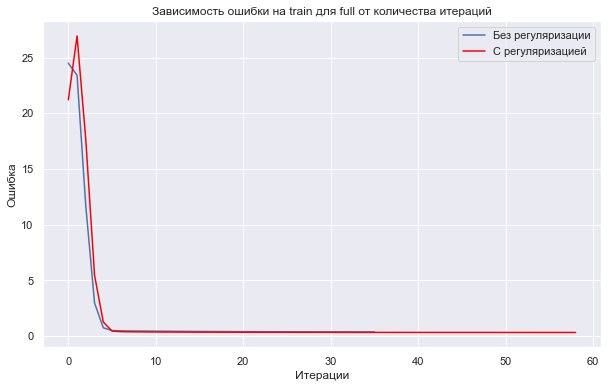

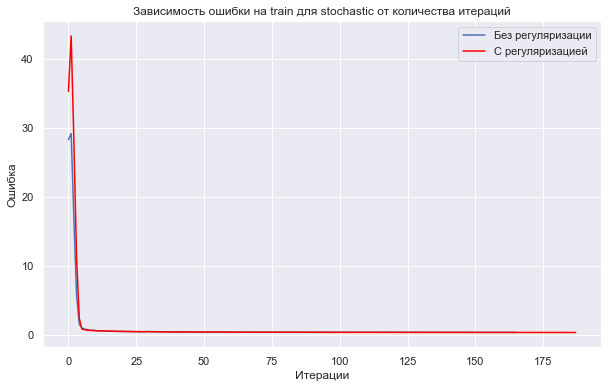

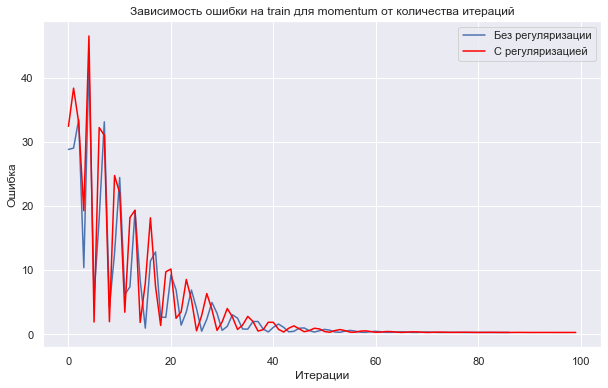

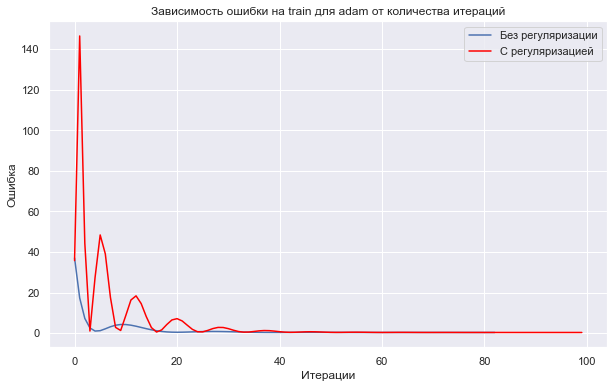

In [46]:
for descent in descents:
    plt.figure(figsize=(10, 6))
    plt.title(f"Зависимость ошибки на train для {descent} от количества итераций")
    plt.xlabel('Итерации')
    plt.ylabel('Ошибка')
    plt.plot(all_loss[descent], label='Без регуляризации')
    plt.plot(reg_loss_history[descent], label='С регуляризацией', color = 'red')
    plt.legend()
    plt.show()

In [47]:
print('Результат без регуляризации')
table

Результат без регуляризации


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.377868  0.372561   0.368532  0.696266  0.702238         36
stochastic    0.352656  0.346207   0.346241  0.717752  0.720249        166
momentum      0.314304  0.310013   0.308514  0.747259  0.750730         87
adam          0.297971  0.292519   0.291721  0.761521  0.764298         83

In [48]:
print('Результат с регуляризацией')
t1 = pd.DataFrame.from_dict(res_reg, orient='index')
t1

Результат с регуляризацией


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.332029  0.324713   0.324606  0.735275  0.737729         59
stochastic    0.333318  0.328262   0.325264  0.732381  0.737197        188
momentum      0.305781  0.299535   0.299126  0.755801  0.758316        100
adam          0.297947  0.292636   0.291854  0.761426  0.764191        100

`### ваше решение тут ###`

У всех методов увеличилось количество итераций до сходимости. Ошибки на test уменьшились почти у всех (это хорошо), кроме adam. Так происходит из-за того, что мы не даем переобучаться модели. На train качество тоже улучшилось. r^2 тоже стал лучше у всех, кроме adam

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

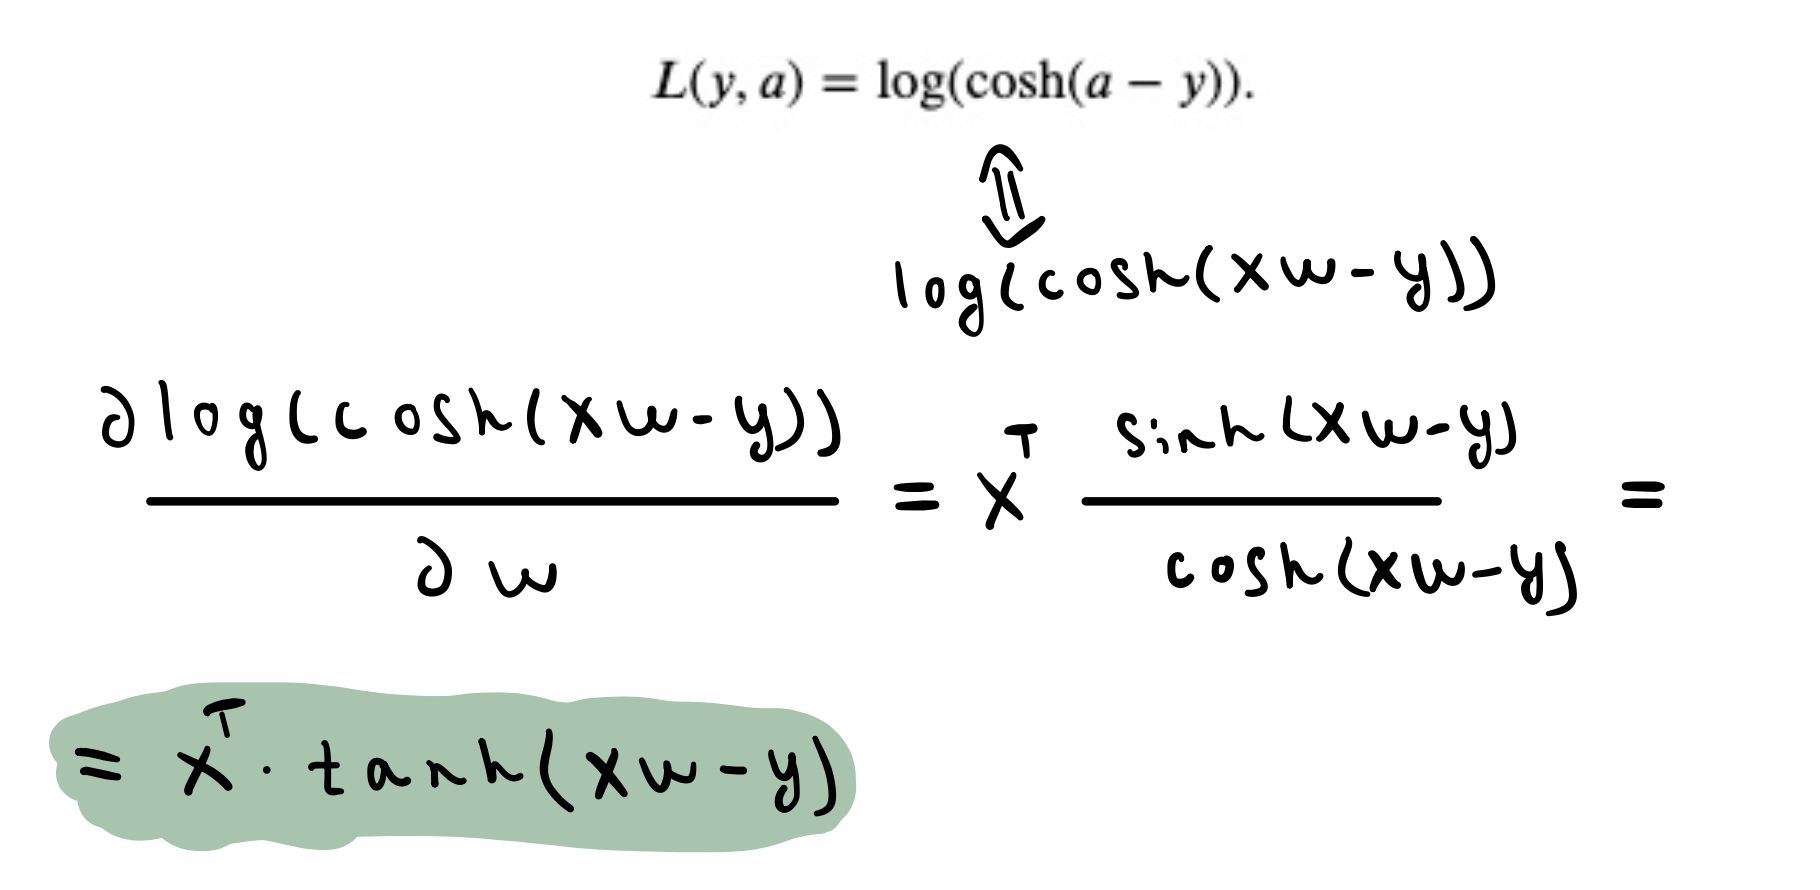

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from linear_regression import LinearRegression
from sklearn.metrics import r2_score
from collections import defaultdict
from descents import LossFunction


def find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent_name):
    best_lr = None
    best_val_loss = np.inf
    best_r2 = -np.inf
    best_iters = 0
    results = {}
    best_loss = None
    lyambdas = np.logspace(-8, 0.6, 10)
    for lr in lyambdas:
        print(f'{descent_name} descent for lr={lr}')
        
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lr,
                'loss_function': LossFunction.LogCosh
            }
        }
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        train_loss = model.calc_loss(X_train, y_train)
        val_loss = model.calc_loss(X_val, y_val)
        test_loss = model.calc_loss(X_test, y_test)
        
        val_r2 = r2_score(y_val, model.predict(X_val))
        test_r2 = r2_score(y_test, model.predict(X_test))
        
        iters = len(model.loss_history)
        
        print(f'Train loss: {train_loss}, Val loss: {val_loss}, Test loss: {test_loss}')
        print(f'R^2 Val: {val_r2}, R^2 Test: {test_r2}')
        print(f'iter: {iters}\n')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lr = lr
            best_r2 = val_r2
            best_iters = iters
            best_loss = model.loss_history
            
        results[lr] = {
            'train_loss': train_loss,
            'val_loss': val_loss,
            'test_loss': test_loss,
            'val_r2': val_r2,
            'test_r2': test_r2,
            'cnt_iters': iters
        }
        
    print(f'\nBest lr for {descent_name} descent: {best_lr}')
    print(f"Train loss: {results[best_lr]['train_loss']}, Val loss: {best_val_loss}, Test loss: {results[best_lr]['test_loss']}")
    print(f"R^2 Val: {best_r2}, R^2 Test: {results[best_lr]['test_r2']}")
    print(f'Count iters: {best_iters}\n')
    print('--------------------')
    
    return best_lr, results[best_lr], best_loss


descents = ['full', 'stochastic', 'momentum', 'adam']
res_logcosh = {}
best_lr_logcosh = {}
all_loss_logcosh = {}

for descent in descents:
    best_lr_logcosh[descent], res_logcosh[descent], all_loss_logcosh[descent] = find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent)



full descent for lr=1e-08
Train loss: 4.979476402697878, Val loss: 4.970992581131946, Test loss: 4.983263735205299
R^2 Val: -28.013134271005523, R^2 Test: -27.87431725663125
iter: 2

full descent for lr=9.027251779484579e-08
Train loss: 4.359498532163058, Val loss: 4.345356589604659, Test loss: 4.367900210300467
R^2 Val: -21.544142545781565, R^2 Test: -21.546578020802595
iter: 2

full descent for lr=8.149127469020748e-07
Train loss: 4.6032803737020025, Val loss: 4.596355169360528, Test loss: 4.601572593083406
R^2 Val: -23.484185525883, R^2 Test: -23.299720037713413
iter: 2

full descent for lr=7.356422544596406e-06
Train loss: 4.865256309023536, Val loss: 4.850718309429141, Test loss: 4.868843149598833
R^2 Val: -27.866293344924777, R^2 Test: -27.753778446768248
iter: 2

full descent for lr=6.640827850634837e-05
Train loss: 4.442050080118919, Val loss: 4.43196551525855, Test loss: 4.446822214963478
R^2 Val: -21.31498318748758, R^2 Test: -21.232009108863576
iter: 2

full descent for lr=0

Train loss: 0.11527529251586792, Val loss: 0.11310953509008416, Test loss: 0.11395194634670765
R^2 Val: 0.7520463745425623, R^2 Test: 0.7556186014506246
iter: 71

adam descent for lr=3.9810717055349722
Train loss: 0.11472779701633971, Val loss: 0.11247536106560861, Test loss: 0.11336114306877369
R^2 Val: 0.753041270280838, R^2 Test: 0.7566789655326864
iter: 109


Best lr for adam descent: 3.9810717055349722
Train loss: 0.11472779701633971, Val loss: 0.11247536106560861, Test loss: 0.11336114306877369
R^2 Val: 0.753041270280838, R^2 Test: 0.7566789655326864
Count iters: 109

--------------------


In [50]:
best_lr_logcosh

{'full': 3.9810717055349722,
 'stochastic': 3.9810717055349722,
 'momentum': 3.9810717055349722,
 'adam': 3.9810717055349722}

In [51]:
print('Результат для MSE loss')
table

Результат для MSE loss


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.377868  0.372561   0.368532  0.696266  0.702238         36
stochastic    0.352656  0.346207   0.346241  0.717752  0.720249        166
momentum      0.314304  0.310013   0.308514  0.747259  0.750730         87
adam          0.297971  0.292519   0.291721  0.761521  0.764298         83

In [52]:
print('Результат для Log-cosh loss')

table_2 = pd.DataFrame.from_dict(res_logcosh, orient='index')
table_2

Результат для Log-cosh loss


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.129706  0.126010   0.127619  0.722929  0.725301         69
stochastic    0.122680  0.119914   0.121002  0.728717  0.732146        301
momentum      0.115882  0.113827   0.114348  0.749835  0.754039         99
adam          0.114728  0.112475   0.113361  0.753041  0.756679        109

Для Log-cosh loss ошибка у всех моделей стала меньше. r^2 увеличился почти у всех кроме adam (у него упал). Также для всех методов увеличилось количество итераций до сходиомсти.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

Блюдо: Татарская разработка

Рецепт банально прост: паста от лучших итальянских поваров, специи по вкусу, вода (желательно чистую). Дальше на открытом огне 5-7 минут и блюдо готово

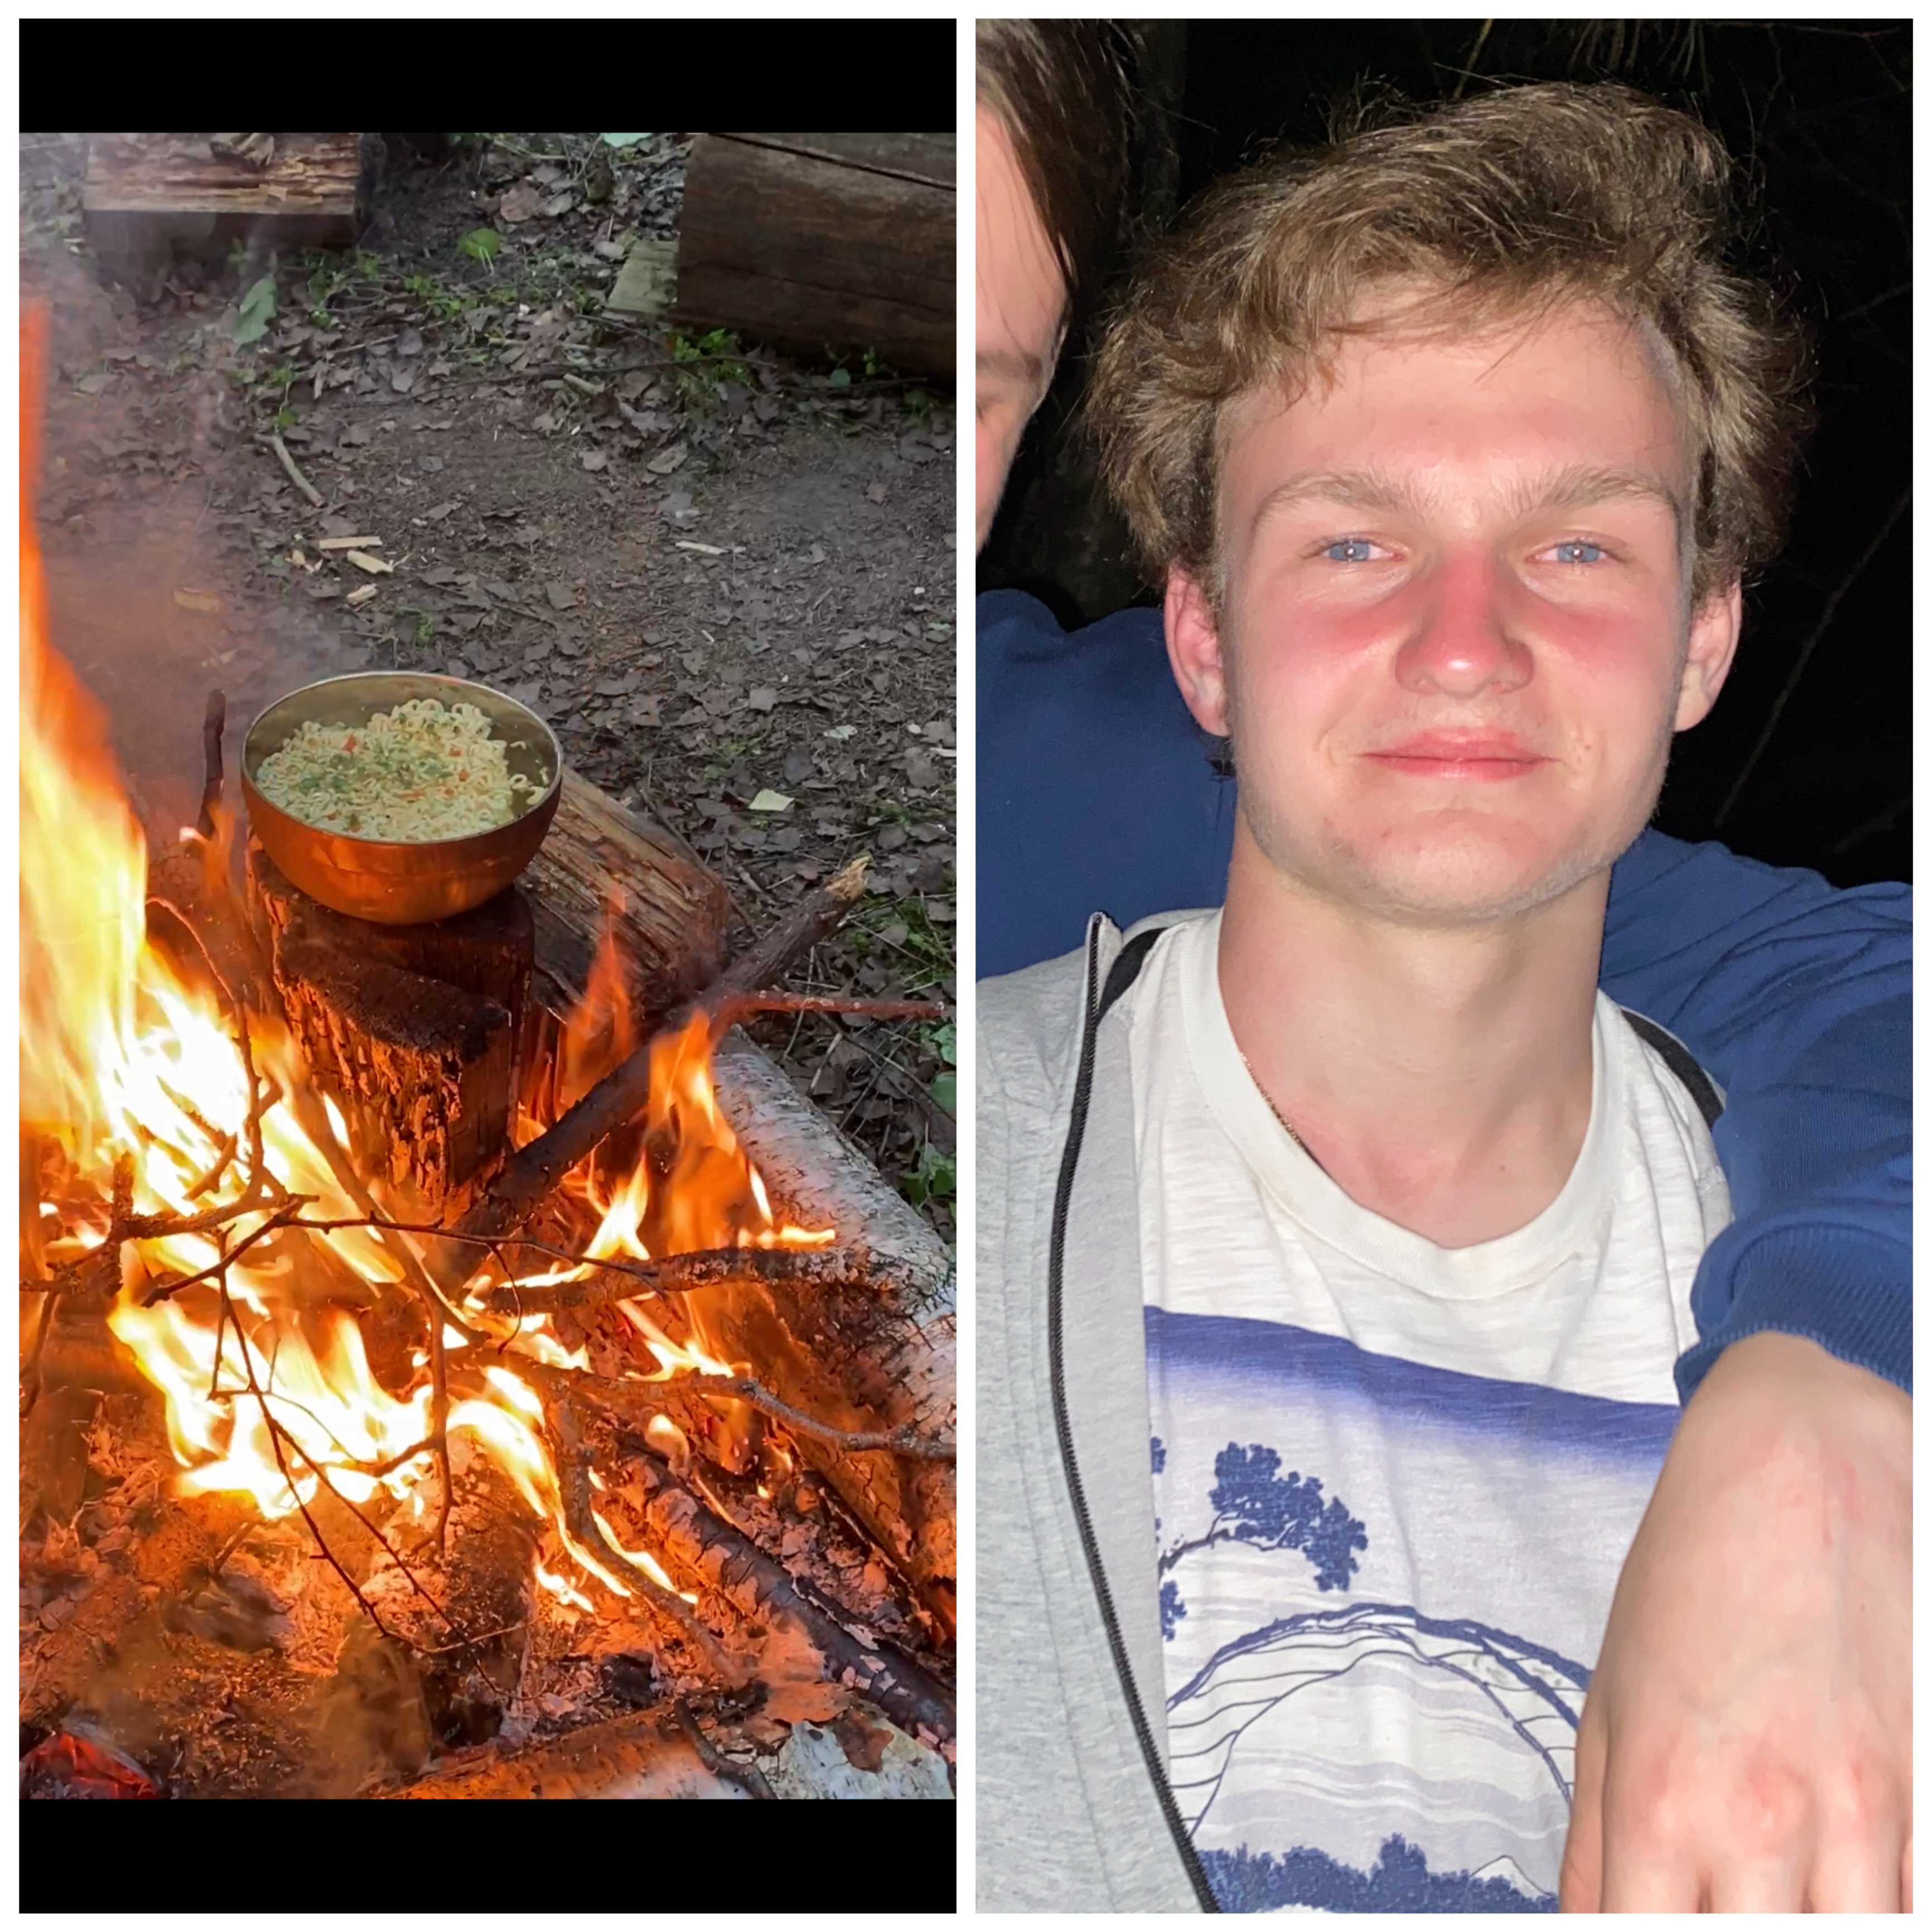

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

Буду реализовывать AMSGrad

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from linear_regression import LinearRegression
from sklearn.metrics import r2_score
from collections import defaultdict
from descents import LossFunction


def find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent_name):
    best_lr = None
    best_val_loss = np.inf
    best_r2 = -np.inf
    best_iters = 0
    results = {}
    best_loss = None
    lyambdas = np.logspace(-8, 0.6, 10)
    for lr in lyambdas:
        print(f'{descent_name} descent for lr={lr}')
        
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lr,
                'loss_function': LossFunction.LogCosh
            }
        }
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        train_loss = model.calc_loss(X_train, y_train)
        val_loss = model.calc_loss(X_val, y_val)
        test_loss = model.calc_loss(X_test, y_test)
        
        val_r2 = r2_score(y_val, model.predict(X_val))
        test_r2 = r2_score(y_test, model.predict(X_test))
        
        iters = len(model.loss_history)
        
        print(f'Train loss: {train_loss}, Val loss: {val_loss}, Test loss: {test_loss}')
        print(f'R^2 Val: {val_r2}, R^2 Test: {test_r2}')
        print(f'iter: {iters}\n')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lr = lr
            best_r2 = val_r2
            best_iters = iters
            best_loss = model.loss_history
            
        results[lr] = {
            'train_loss': train_loss,
            'val_loss': val_loss,
            'test_loss': test_loss,
            'val_r2': val_r2,
            'test_r2': test_r2,
            'cnt_iters': iters
        }
        
    print(f'\nBest lr for {descent_name} descent: {best_lr}')
    print(f"Train loss: {results[best_lr]['train_loss']}, Val loss: {best_val_loss}, Test loss: {results[best_lr]['test_loss']}")
    print(f"R^2 Val: {best_r2}, R^2 Test: {results[best_lr]['test_r2']}")
    print(f'Count iters: {best_iters}\n')
    print('--------------------')
    
    return best_lr, results[best_lr], best_loss


descents = ['amsgrad']
res_amsgrad = {}
best_lr_amsgrad = {}
all_loss_amsgrad = {}

for descent in descents:
    best_lr_amsgrad[descent], res_amsgrad[descent], all_loss_amsgrad[descent] = find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent)



amsgrad descent for lr=1e-08
Train loss: 4.313190522862605, Val loss: 4.2990990537776375, Test loss: 4.313830282335524
R^2 Val: -22.056674925429107, R^2 Test: -21.960339451874102
iter: 2

amsgrad descent for lr=9.027251779484579e-08
Train loss: 4.187360179747032, Val loss: 4.1794130432123096, Test loss: 4.186343212282813
R^2 Val: -20.597644572182336, R^2 Test: -20.46477394401027
iter: 2

amsgrad descent for lr=8.149127469020748e-07
Train loss: 4.944143465539898, Val loss: 4.936212214630749, Test loss: 4.942511012058086
R^2 Val: -26.952445543521847, R^2 Test: -26.773018063770802
iter: 2

amsgrad descent for lr=7.356422544596406e-06
Train loss: 3.9076339814347607, Val loss: 3.893341409324125, Test loss: 3.9085724885344266
R^2 Val: -18.862777290874824, R^2 Test: -18.78567463839394
iter: 2

amsgrad descent for lr=6.640827850634837e-05
Train loss: 5.315372231501497, Val loss: 5.305209197974419, Test loss: 5.314202983610418
R^2 Val: -31.90484486844074, R^2 Test: -31.681901477024688
iter: 2



In [54]:
best_lr_amsgrad

{'amsgrad': 3.9810717055349722}

In [55]:
print('Результат для предыдущих методов')
table_2

Результат для предыдущих методов


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.129706  0.126010   0.127619  0.722929  0.725301         69
stochastic    0.122680  0.119914   0.121002  0.728717  0.732146        301
momentum      0.115882  0.113827   0.114348  0.749835  0.754039         99
adam          0.114728  0.112475   0.113361  0.753041  0.756679        109

In [56]:
print('Результат для AMSGrad')

table_3 = pd.DataFrame.from_dict(res_amsgrad, orient='index')
table_3

Результат для AMSGrad


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
amsgrad    0.114694  0.112449   0.113307  0.753069  0.756776        143

Видно, что ошибка (по Log-cosh loss) стала меньше по сравнению со всеми моделями ранее. Лучшую ошибку до этого показывал adam, а теперь уже AMSGrad. Также видно, что по сравнению с adam для AMSGrad тратиться больше итераций до сходимости

Посмотрим на сходимость всех методов (вместе с AMSGrad)

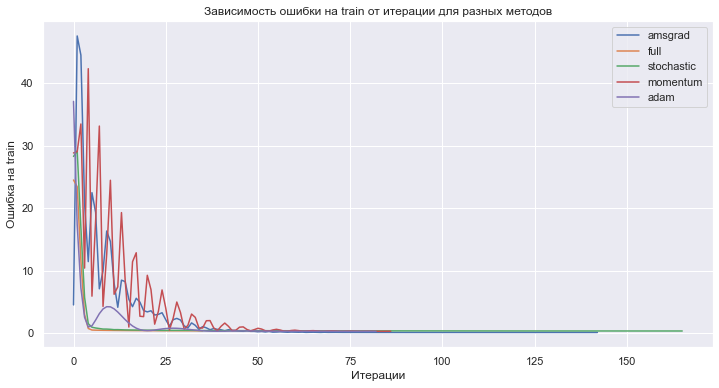

In [57]:
plt.figure(figsize=(12, 6))
all_methods = {**all_loss_amsgrad, **all_loss}
for descent, loss in all_methods.items():
    plt.plot(loss, label=descent)


plt.title('Зависимость ошибки на train от итерации для разных методов')
plt.xlabel('Итерации')
plt.ylabel('Ошибка на train')
plt.legend()
plt.show()

Посмотрим на log ошибку

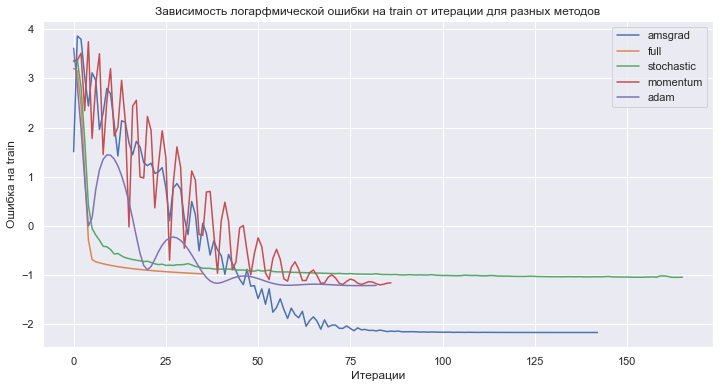

In [58]:
plt.figure(figsize=(12, 6))
for descent, loss in all_methods.items():
    plt.plot(np.log(loss), label=descent)


plt.title('Зависимость логарфмической ошибки на train от итерации для разных методов')
plt.xlabel('Итерации')
plt.ylabel('Ошибка на train')
plt.legend()
plt.show()

Видно, что для AMSGrad ошибка сразу начинает колебаться (в отличии от adam). Но в конце все равно становиться меньше всех

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

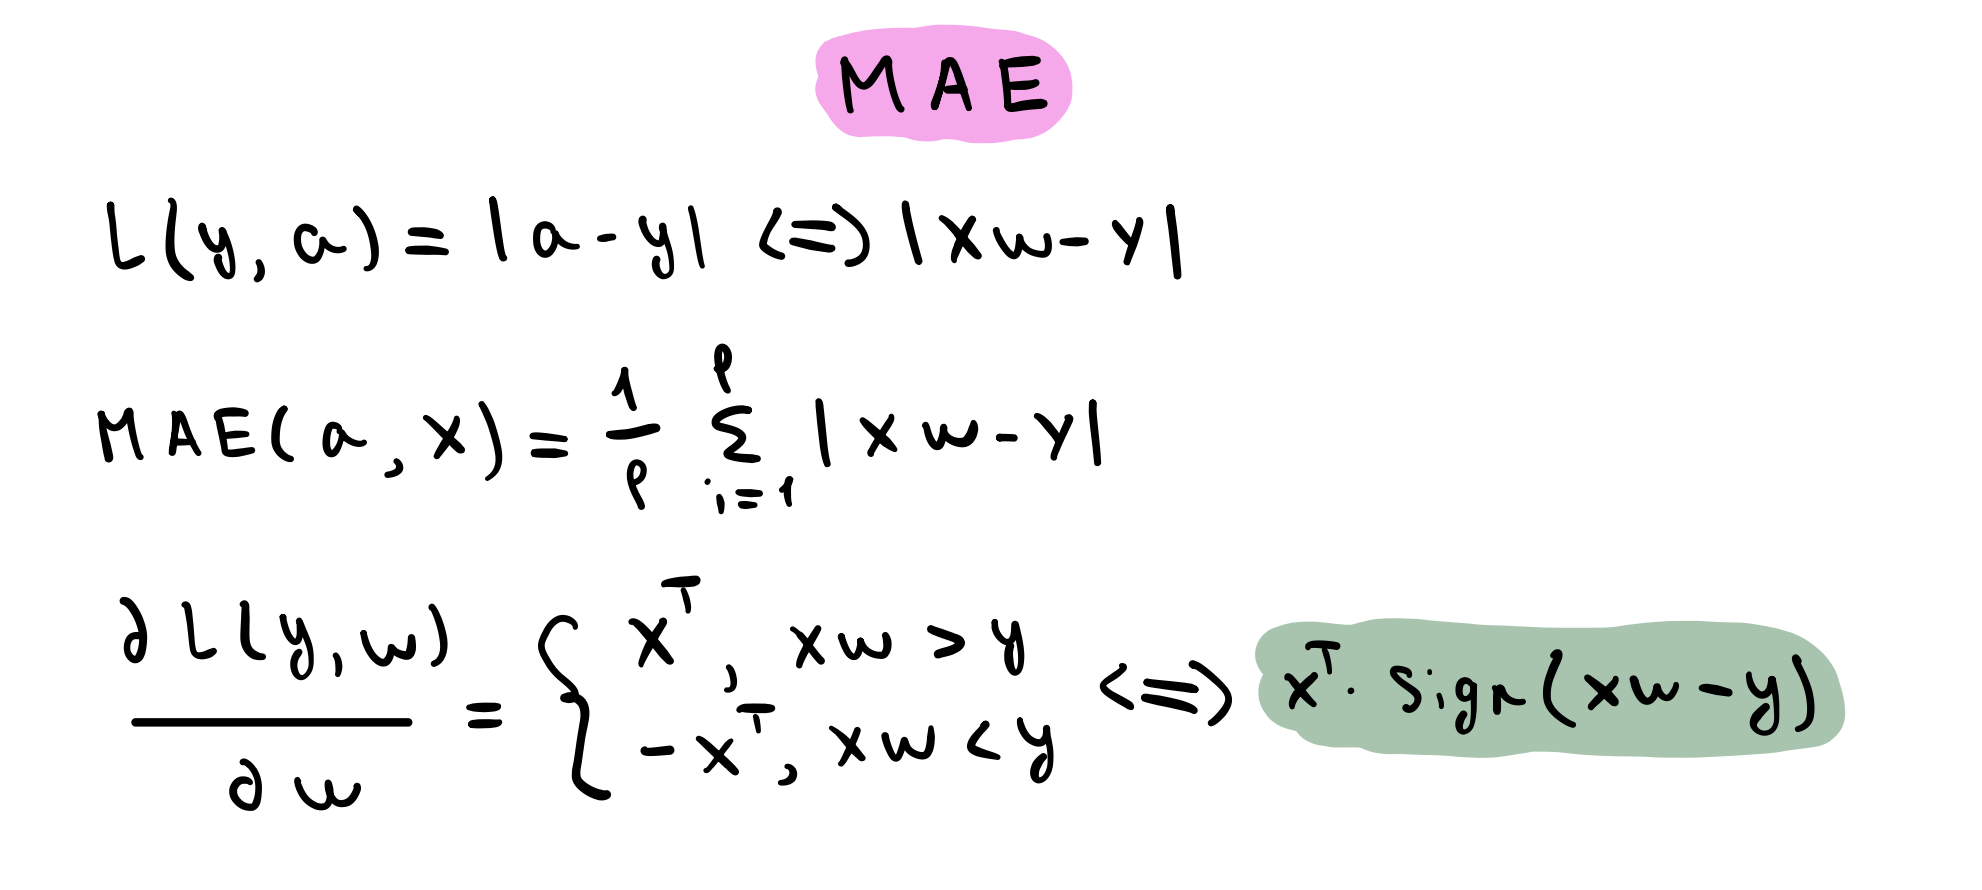

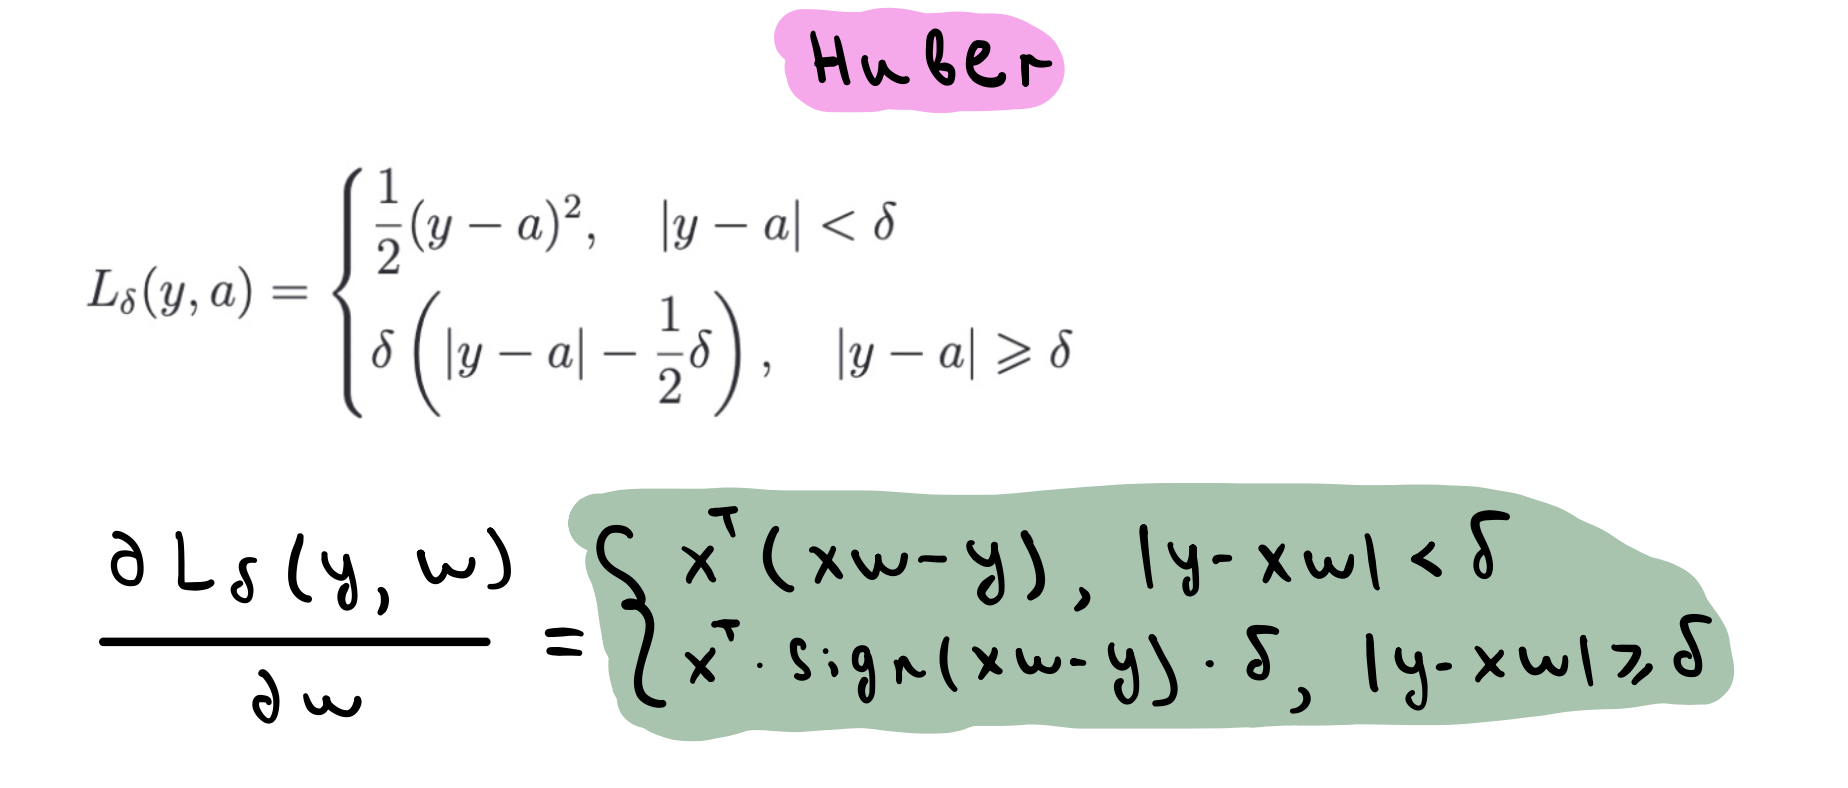

Возьму $\delta = 1$, как дефолтное значение 

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

Сначала MAE

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from linear_regression import LinearRegression
from sklearn.metrics import r2_score
from collections import defaultdict
from descents import LossFunction


def find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent_name):
    best_lr = None
    best_val_loss = np.inf
    best_r2 = -np.inf
    best_iters = 0
    results = {}
    best_loss = None
    lyambdas = np.logspace(-8, 0.6, 10)
    for lr in lyambdas:
        print(f'{descent_name} descent for lr={lr}')
        
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lr,
                'loss_function': LossFunction.MAE
            }
        }
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        train_loss = model.calc_loss(X_train, y_train)
        val_loss = model.calc_loss(X_val, y_val)
        test_loss = model.calc_loss(X_test, y_test)
        
        val_r2 = r2_score(y_val, model.predict(X_val))
        test_r2 = r2_score(y_test, model.predict(X_test))
        
        iters = len(model.loss_history)
        
        print(f'Train loss: {train_loss}, Val loss: {val_loss}, Test loss: {test_loss}')
        print(f'R^2 Val: {val_r2}, R^2 Test: {test_r2}')
        print(f'iter: {iters}\n')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lr = lr
            best_r2 = val_r2
            best_iters = iters
            best_loss = model.loss_history
            
        results[lr] = {
            'train_loss': train_loss,
            'val_loss': val_loss,
            'test_loss': test_loss,
            'val_r2': val_r2,
            'test_r2': test_r2,
            'cnt_iters': iters
        }
        
    print(f'\nBest lr for {descent_name} descent: {best_lr}')
    print(f"Train loss: {results[best_lr]['train_loss']}, Val loss: {best_val_loss}, Test loss: {results[best_lr]['test_loss']}")
    print(f"R^2 Val: {best_r2}, R^2 Test: {results[best_lr]['test_r2']}")
    print(f'Count iters: {best_iters}\n')
    print('--------------------')
    
    return best_lr, results[best_lr], best_loss


descents = ['full', 'stochastic', 'momentum', 'adam', 'amsgrad']
res_mae = {}
best_lr_mae = {}
all_loss_mae = {}

for descent in descents:
    best_lr_mae[descent], res_mae[descent], all_loss_mae[descent] = find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent)



full descent for lr=1e-08
Train loss: 5.4571402274308305, Val loss: 5.445414207115702, Test loss: 5.4637226397999346
R^2 Val: -25.105888209533106, R^2 Test: -25.02783589432151
iter: 2

full descent for lr=9.027251779484579e-08
Train loss: 5.340366849345505, Val loss: 5.333884014009299, Test loss: 5.3408648565247026
R^2 Val: -23.719770521043355, R^2 Test: -23.575678663612536
iter: 2

full descent for lr=8.149127469020748e-07
Train loss: 4.540958813518403, Val loss: 4.530208332695744, Test loss: 4.541964124079021
R^2 Val: -18.502592673496718, R^2 Test: -18.396313739528985
iter: 2

full descent for lr=7.356422544596406e-06
Train loss: 5.574007151855688, Val loss: 5.565084444260501, Test loss: 5.5722493808809865
R^2 Val: -27.247080183037735, R^2 Test: -27.052953227890683
iter: 2

full descent for lr=6.640827850634837e-05
Train loss: 5.144341372941305, Val loss: 5.131698335538289, Test loss: 5.146942615429092
R^2 Val: -23.049611743496882, R^2 Test: -22.984520770127897
iter: 2

full descent 

Train loss: 0.355186130811058, Val loss: 0.35131332875286386, Test loss: 0.3531247417708813
R^2 Val: 0.7273414316734549, R^2 Test: 0.7319431033186502
iter: 82

adam descent for lr=3.9810717055349722
Train loss: 0.3550540616739317, Val loss: 0.3512985419351225, Test loss: 0.3531510331740194
R^2 Val: 0.7278095965966902, R^2 Test: 0.7322168546480549
iter: 123


Best lr for adam descent: 3.9810717055349722
Train loss: 0.3550540616739317, Val loss: 0.3512985419351225, Test loss: 0.3531510331740194
R^2 Val: 0.7278095965966902, R^2 Test: 0.7322168546480549
Count iters: 123

--------------------
amsgrad descent for lr=1e-08
Train loss: 4.896844767317378, Val loss: 4.8786003714361295, Test loss: 4.904498705374265
R^2 Val: -22.43764625625654, R^2 Test: -22.446531332097113
iter: 2

amsgrad descent for lr=9.027251779484579e-08
Train loss: 5.198572368105464, Val loss: 5.185689903305369, Test loss: 5.202467941780673
R^2 Val: -24.016891989322307, R^2 Test: -23.970795369657736
iter: 2

amsgrad descent

Теперь Huber

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from linear_regression import LinearRegression
from sklearn.metrics import r2_score
from collections import defaultdict
from descents import LossFunction


def find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent_name):
    best_lr = None
    best_val_loss = np.inf
    best_r2 = -np.inf
    best_iters = 0
    results = {}
    best_loss = None
    lyambdas = np.logspace(-8, 0.6, 10)
    for lr in lyambdas:
        print(f'{descent_name} descent for lr={lr}')
        
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lr,
                'loss_function': LossFunction.Huber
            }
        }
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        train_loss = model.calc_loss(X_train, y_train)
        val_loss = model.calc_loss(X_val, y_val)
        test_loss = model.calc_loss(X_test, y_test)
        
        val_r2 = r2_score(y_val, model.predict(X_val))
        test_r2 = r2_score(y_test, model.predict(X_test))
        
        iters = len(model.loss_history)
        
        print(f'Train loss: {train_loss}, Val loss: {val_loss}, Test loss: {test_loss}')
        print(f'R^2 Val: {val_r2}, R^2 Test: {test_r2}')
        print(f'iter: {iters}\n')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_lr = lr
            best_r2 = val_r2
            best_iters = iters
            best_loss = model.loss_history
            
        results[lr] = {
            'train_loss': train_loss,
            'val_loss': val_loss,
            'test_loss': test_loss,
            'val_r2': val_r2,
            'test_r2': test_r2,
            'cnt_iters': iters
        }
        
    print(f'\nBest lr for {descent_name} descent: {best_lr}')
    print(f"Train loss: {results[best_lr]['train_loss']}, Val loss: {best_val_loss}, Test loss: {results[best_lr]['test_loss']}")
    print(f"R^2 Val: {best_r2}, R^2 Test: {results[best_lr]['test_r2']}")
    print(f'Count iters: {best_iters}\n')
    print('--------------------')
    
    return best_lr, results[best_lr], best_loss


descents = ['full', 'stochastic', 'momentum', 'adam', 'amsgrad']
res_huber = {}
best_lr_huber = {}
all_loss_huber = {}

for descent in descents:
    best_lr_huber[descent], res_huber[descent], all_loss_huber[descent] = find_hyperparam(X_train, y_train, X_val, y_val, X_test, y_test, descent)



full descent for lr=1e-08
Train loss: 4.11766174266278, Val loss: 4.099161272403005, Test loss: 4.128638578179034
R^2 Val: -20.78284481247499, R^2 Test: -20.82444858081567
iter: 2

full descent for lr=9.027251779484579e-08
Train loss: 3.8213000224194316, Val loss: 3.805914549483211, Test loss: 3.823949381383517
R^2 Val: -17.669825671572614, R^2 Test: -17.61561312361543
iter: 2

full descent for lr=8.149127469020748e-07
Train loss: 4.192949611001908, Val loss: 4.179163236503188, Test loss: 4.199422997235999
R^2 Val: -19.49593258797418, R^2 Test: -19.459962366383845
iter: 2

full descent for lr=7.356422544596406e-06
Train loss: 4.434933957273739, Val loss: 4.422051879047857, Test loss: 4.443589912104311
R^2 Val: -21.030497913112168, R^2 Test: -20.998944308369467
iter: 2

full descent for lr=6.640827850634837e-05
Train loss: 4.643251496804942, Val loss: 4.633254514092144, Test loss: 4.642820470588438
R^2 Val: -23.462633823048225, R^2 Test: -23.30929545407868
iter: 2

full descent for lr=0

Train loss: 0.12562230335537006, Val loss: 0.12304392748353611, Test loss: 0.12414649523899605
R^2 Val: 0.7512296267942222, R^2 Test: 0.7549507303360338
iter: 76

adam descent for lr=3.9810717055349722
Train loss: 0.12575981209409887, Val loss: 0.12318679692378734, Test loss: 0.12435756140264417
R^2 Val: 0.7515219201515453, R^2 Test: 0.7551743645878041
iter: 98


Best lr for adam descent: 0.4410059454176732
Train loss: 0.12562230335537006, Val loss: 0.12304392748353611, Test loss: 0.12414649523899605
R^2 Val: 0.7512296267942222, R^2 Test: 0.7549507303360338
Count iters: 76

--------------------
amsgrad descent for lr=1e-08
Train loss: 4.5405943268690825, Val loss: 4.52741797684571, Test loss: 4.5402602939462735
R^2 Val: -21.97160864191261, R^2 Test: -21.875522455768298
iter: 2

amsgrad descent for lr=9.027251779484579e-08
Train loss: 5.888781238963475, Val loss: 5.8764888107609305, Test loss: 5.899987503782518
R^2 Val: -34.28848631118847, R^2 Test: -34.22723791420541
iter: 2

amsgrad d

In [61]:
table_23 = pd.concat([table_2, table_3])

In [62]:
table_4 = pd.DataFrame.from_dict(res_mae, orient='index')

In [63]:
table_5 = pd.DataFrame.from_dict(res_huber, orient='index')

In [64]:
print('Результаты для MSE')
table

Результаты для MSE


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.377868  0.372561   0.368532  0.696266  0.702238         36
stochastic    0.352656  0.346207   0.346241  0.717752  0.720249        166
momentum      0.314304  0.310013   0.308514  0.747259  0.750730         87
adam          0.297971  0.292519   0.291721  0.761521  0.764298         83

In [65]:
print('Результаты для Logcosh')
table_23

Результаты для Logcosh


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.129706  0.126010   0.127619  0.722929  0.725301         69
stochastic    0.122680  0.119914   0.121002  0.728717  0.732146        301
momentum      0.115882  0.113827   0.114348  0.749835  0.754039         99
adam          0.114728  0.112475   0.113361  0.753041  0.756679        109
amsgrad       0.114694  0.112449   0.113307  0.753069  0.756776        143

In [66]:
print('Результаты для MAE')
table_4

Результаты для MAE


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.363342  0.359195   0.361293  0.722331  0.725421        301
stochastic    0.411198  0.409994   0.408924  0.686772  0.694643        301
momentum      0.357831  0.353748   0.355438  0.726925  0.730995        256
adam          0.355054  0.351299   0.353151  0.727810  0.732217        123
amsgrad       0.355041  0.351236   0.353067  0.726880  0.731364        102

In [67]:
print('Результаты для Huber')
table_5

Результаты для Huber


train_loss  val_loss  test_loss    val_r2   test_r2  cnt_iters
full          0.137914  0.134824   0.135114  0.729624  0.734583         64
stochastic    0.132903  0.129919   0.131179  0.728591  0.731992        301
momentum      0.127294  0.125063   0.125701  0.748188  0.752602        135
adam          0.125622  0.123044   0.124146  0.751230  0.754951         76
amsgrad       0.125397  0.122868   0.123960  0.752243  0.755948        141

При MAE количество итераций сильно увеличилось кроме amsgrad (там стала меньше). Ошибки соезмеримы с MSE. У Huber ошибки соезмиримы с Logcosh. r^2 у всех примерно одинаковые.

Минимальные ошибки показывает Logcosh, потом идет Huber, затем MSE, потом MAE.
Если усреднить все ошибки, то лучшую ошику показал AMSGrad (для всех он лучший, кроме MAE, там чуууть лучше adam)

Думаю минимальную ошибку показывает Logcosh из-за того, что это по сути Huber (который являются смесью MSE + MAE, то есть улучшенная ошибка), только еще у второй производной Logcosh нет разрывов ( в отличии от Huber)